In [1]:
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl
import numpy as np
from numpy import genfromtxt
import pandas as pd
import datetime
import seaborn as sns
from scipy.stats import pearsonr
import itertools
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d

from google.colab import drive
drive.mount('/gdrive')
drive_loc = '/gdrive/My Drive/LSTID/'

MessageError: Error: credential propagation was unsuccessful

In [ ]:
data = pd.read_csv(drive_loc + 'lstid_driver_full_2017_exp.csv')
data['date'] = pd.to_datetime(data['date'])
data['ae_max'].replace('1,070.00', '1070', inplace=True)
data['ae_max'] = data['ae_max'].astype(float)
data

Unnamed: 0       date        pv  tid  ae_slope      ae_max      varea  \
0             0 2017-01-01  1.338138    0         0  464.666667  33.656567   
1             1 2017-01-02  1.362146    9      -244  463.750000  34.373220   
2             2 2017-01-03  1.309619    9        91  519.250000  34.830030   
3             3 2017-01-04  1.127149    0       102  765.333333  34.022686   
4             4 2017-01-05  0.994739    4       -61  620.583333  32.566230   
..          ...        ...       ...  ...       ...         ...        ...   
360         360 2017-12-27  1.314453    4      -337  404.000000  21.484190   
361         361 2017-12-28  1.237787    0      -258  186.833333  24.289408   
362         362 2017-12-29  1.277944    0        33  218.166667  23.129710   
363         363 2017-12-30  1.332961    0       100  231.333333  23.887358   
364         364 2017-12-31  1.408036    0       -19  282.750000  22.091953   

          u_nh   u_slope      sym_h  k_winds         sme      airs  \
0    52.112160  0.000000 -19.538194        0  286.407639  0.117922   
1    59.995500  7.883340 -17.284722        0  224.033333  0.121230   
2    62.004780  2.009280 -13.979167        0  249.276389  0.140051   
3    70.649390  8.644610  -9.715278        0  231.931250  0.147170   
4    73.907326  3.257936 -14.225694        0  353.283333  0.177134   
..         ...       ...        ...      ...         ...       ...   
360  88.051346  6.267861  -6.899306        0  193.418750  0.134835   
361  88.984360  0.933014  -6.746528        0  114.490972  0.157334   
362  85.255360 -3.729000  -2.010417        0   98.433333  0.119963   
363  80.555470 -4.699890   1.579861        0  116.663889  0.128906   
364  78.436424 -2.119046   4.840278        0  113.445833  0.067880   

        xrsb_flux  
0    0.000000e+00  
1    0.000000e+00  
2    0.000000e+00  
3    0.000000e+00  
4    0.000000e+00  
..            ...  
360  5.570000e-08  
361  1.280000e-06  
362  1.290000e-07  
363  3.040000e-08  
364  3.650000e-08  

[365 rows x 14 columns]

In [ ]:
reference_time = data['date'].iloc[0]
data['date_s'] = (data['date'] - reference_time).dt.total_seconds()
data['dpv'] = np.gradient(data['pv'], (data['date_s']))
data['dsme'] = np.gradient(data['sme'])

In [ ]:
#test = data
#test['dairs'] = np.gradient(test['airs'])
#test1 = test[(test['dairs'] > 0.0004) | (test['dairs'] < -0.0004)]
#test2 = test[test['airs'] > 0.0035]
#test3 = test[test['tid'] > 0]
#plt.scatter(test1['date'], test1['dairs'])
#plt.scatter(test2['date'], test2['airs'])
#plt.bar(test3['date'], test3['tid'])

In [ ]:
np.gradient(data['dsme'])

array([ 4.38086806e+01,  3.31616320e+01,  3.52845486e+01,  2.38246528e+01,
       -2.01060764e+01, -2.33685764e+01, -3.17984375e+01, -2.62383681e+01,
        1.64409725e-01, -6.24774305e+00,  1.56015625e+01,  2.50760417e+01,
        1.62486111e+01, -5.95920137e+00, -2.18102431e+01,  8.40144097e+01,
        6.12440972e+01, -1.15649826e+02, -5.74718750e+01,  5.26427083e+01,
       -9.57239585e+00, -4.40246528e+01,  1.65435764e+01,  7.07130208e+01,
        6.81887153e+01, -5.09093750e+01, -1.16900868e+02,  5.36475692e+00,
        1.10488542e+02,  9.64241320e+01, -5.87878472e+01, -1.25161111e+02,
       -3.26010417e+01,  2.54753472e+01,  4.11050347e+01, -1.70593750e+01,
       -4.49857639e+01,  1.98383681e+01,  5.79595486e+01, -4.26250000e+00,
       -4.11722222e+01,  3.35220486e+01,  1.19196181e+01, -4.00296875e+01,
        4.21326389e+01,  9.64298611e+01, -2.52708331e+00, -1.18661979e+02,
       -5.84505209e+01,  6.72638890e+00,  3.62902778e+01,  7.01006944e+01,
        3.09253472e+01, -

In [ ]:
da_fil = data[data['tid'] > 0]
da_fil

Unnamed: 0       date        pv  tid  ae_slope      ae_max      varea  \
1             1 2017-01-02  1.362146    9      -244  463.750000  34.373220   
2             2 2017-01-03  1.309619    9        91  519.250000  34.830030   
4             4 2017-01-05  0.994739    4       -61  620.583333  32.566230   
5             5 2017-01-06  0.887683    7        63  521.083333  13.645418   
14           14 2017-01-15  0.545784    8       348  334.833333  15.563280   
..          ...        ...       ...  ...       ...         ...        ...   
353         353 2017-12-20  1.274616    7      -113  281.500000  22.312529   
357         357 2017-12-24  1.181276    8       530  579.083333  20.994085   
358         358 2017-12-25  1.273049   10      -114  545.083333  25.399600   
359         359 2017-12-26  1.347059    7       180  555.583333  23.850538   
360         360 2017-12-27  1.314453    4      -337  404.000000  21.484190   

          u_nh   u_slope      sym_h  k_winds         sme      airs  \
1    59.995500  7.883340 -17.284722        0  224.033333  0.121230   
2    62.004780  2.009280 -13.979167        0  249.276389  0.140051   
4    73.907326  3.257936 -14.225694        0  353.283333  0.177134   
5    73.548900 -0.358426 -21.107639        0  335.127778  0.205134   
14   48.050540 -2.598844  -1.958333        0  154.201389  0.038836   
..         ...       ...        ...      ...         ...       ...   
353  81.814995  5.069095  -8.996528        0  153.686806  0.144849   
357  85.171760  5.331640  -1.437500        0  237.380556  0.119966   
358  83.490550 -1.681210 -11.729167        0  255.972917  0.121408   
359  81.783485 -1.707065 -13.312500        0  238.059722  0.109870   
360  88.051346  6.267861  -6.899306        0  193.418750  0.134835   

        xrsb_flux      date_s           dpv       dsme  
1    0.000000e+00     86400.0 -1.650402e-07 -18.565625  
2    0.000000e+00    172800.0 -1.359938e-06   3.948958  
4    0.000000e+00    345600.0 -1.385799e-06  51.598264  
5    0.000000e+00    432000.0 -1.674604e-06  11.791319  
14   0.000000e+00   1209600.0 -1.654376e-06 -21.877431  
..            ...         ...           ...        ...  
353  4.120000e-07  30499200.0  1.070981e-06 -31.822917  
357  1.090000e-07  30844800.0  3.964117e-07  64.054514  
358  1.020000e-07  30931200.0  9.593948e-07   0.339583  
359  6.090000e-08  31017600.0  2.396099e-07 -31.277083  
360  5.570000e-08  31104000.0 -6.323609e-07 -61.784375  

[94 rows x 17 columns]

In [ ]:
def of_name(name):
  if name == 'pv':
    return 'Polar Vortex Index'
  if name == 'ae_max':
    return 'Auroral Electrojet (max)'
  if name == 'ae_slope':
    return 'Auroral Electrojet (Slope)'
  if name == 'dpv':
    return 'Polar Vortex Index Derivative'
  if name == 'u_nh':
    return '60N Zonal Winds'
  if name == 'k_winds':
    return 'Kansas Winds'
  if name == 'sym_h':
    return 'SYM-H'
  if name == 'sme':
    return 'SME'
  if name == 'airs':
    return 'AIRS'
  if name == 'u_slope':
    return '60N Zonal Wind (Slope)'
  if name == 'varea':
    return 'Vortex Area'
  if name == 'dsme':
    return 'DSME'
  if name == 'xrsb_flux':
    return 'GOES 16 XRSB Flux'

In [ ]:
def all(df, name):
  if name == 'xrsb_flux':
    da = df[df[name] >= 0.0000005]
    return 'GOES 16 XRSB Flux', da
  if name == 'pv':
    da = df[df[name] >= 100]
    return 'Polar Vortex Index', da
  if name == 'ae_max':
    da = df[df[name] >= 700]
    return 'Auroral Electrojet (max)', da
  if name == 'ae_slope':
    da = df[(df['ae_slope'] >= 250) | (df['ae_slope'] <= -250)]
    return 'Auroral Electrojet (Slope)', da
  if name == 'dpv':
    da = df[(df[name] >= 0.5e-06) | (df[name] <= -0.5e-06)]
    return 'Polar Vortex Index Derivative', da
  if name == 'u_nh':
    da = df[(df[name] >= 50) | (df[name] <= -50)]
    return '60N Zonal Winds', da
  if name == 'k_winds':
    da = df[df[name] > 0]
    return 'Kansas Winds', da
  if name == 'sym_h':
    da = df[df[name] <= -20]
    return 'SYM-H', da
  if name == 'sme':
    da = df[df[name] >= 400]
    return 'SME', da
  if name == 'airs':
    da = df[df[name] >= 0.0035]
    return 'AIRS', da
  if name == 'u_slope':
    da = df[(df[name] >= 5) | (df[name] <= -5)]
    return '60N Zonal Wind (Slope)', da
  if name == 'varea':
    da = df[df[name] >= 10]
    return 'Vortex Area', da
  if name == 'dsme':
    da = df[(df['dsme'] >= 200)]
    return 'DSME', da

In [ ]:
def met_check(name):
  if name == 'airs' or name == 'pv' or name == 'dpv' or name == 'k_winds' or name == 'varea' or name == 'u_nh' or name == 'u_slope':
    return True
  else:
    return False

In [ ]:
def geo_check(name):
  if name == 'sme' or name == 'dsme' or name == 'ae_max' or name == 'ae_slope' or name == 'sym_h':
    return True
  else:
    return False

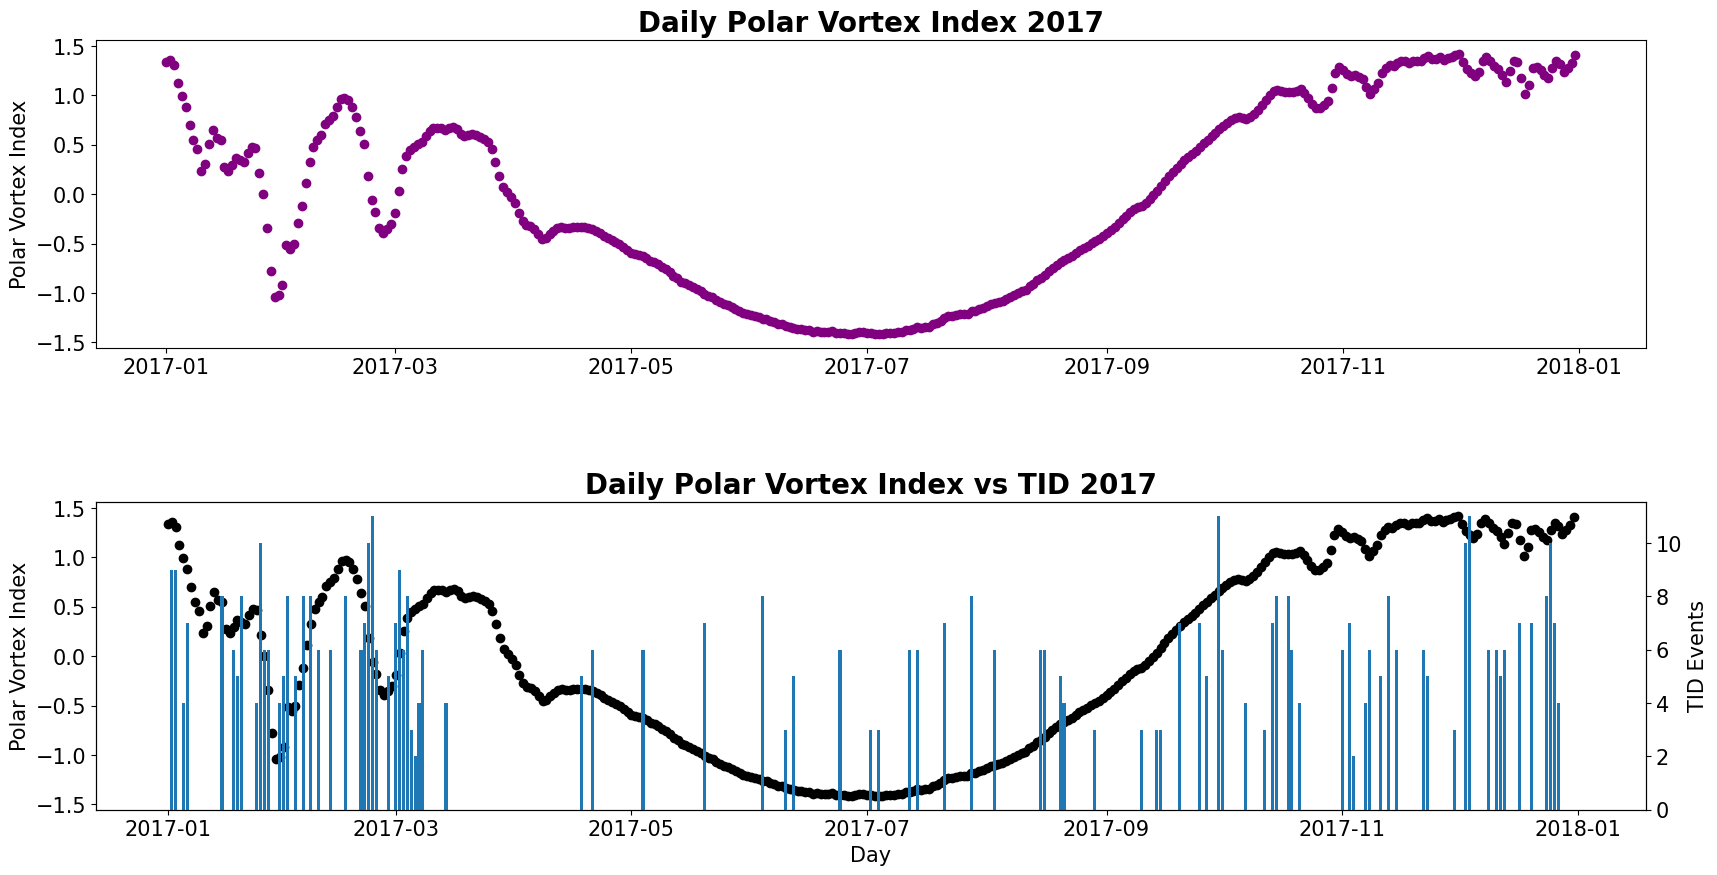

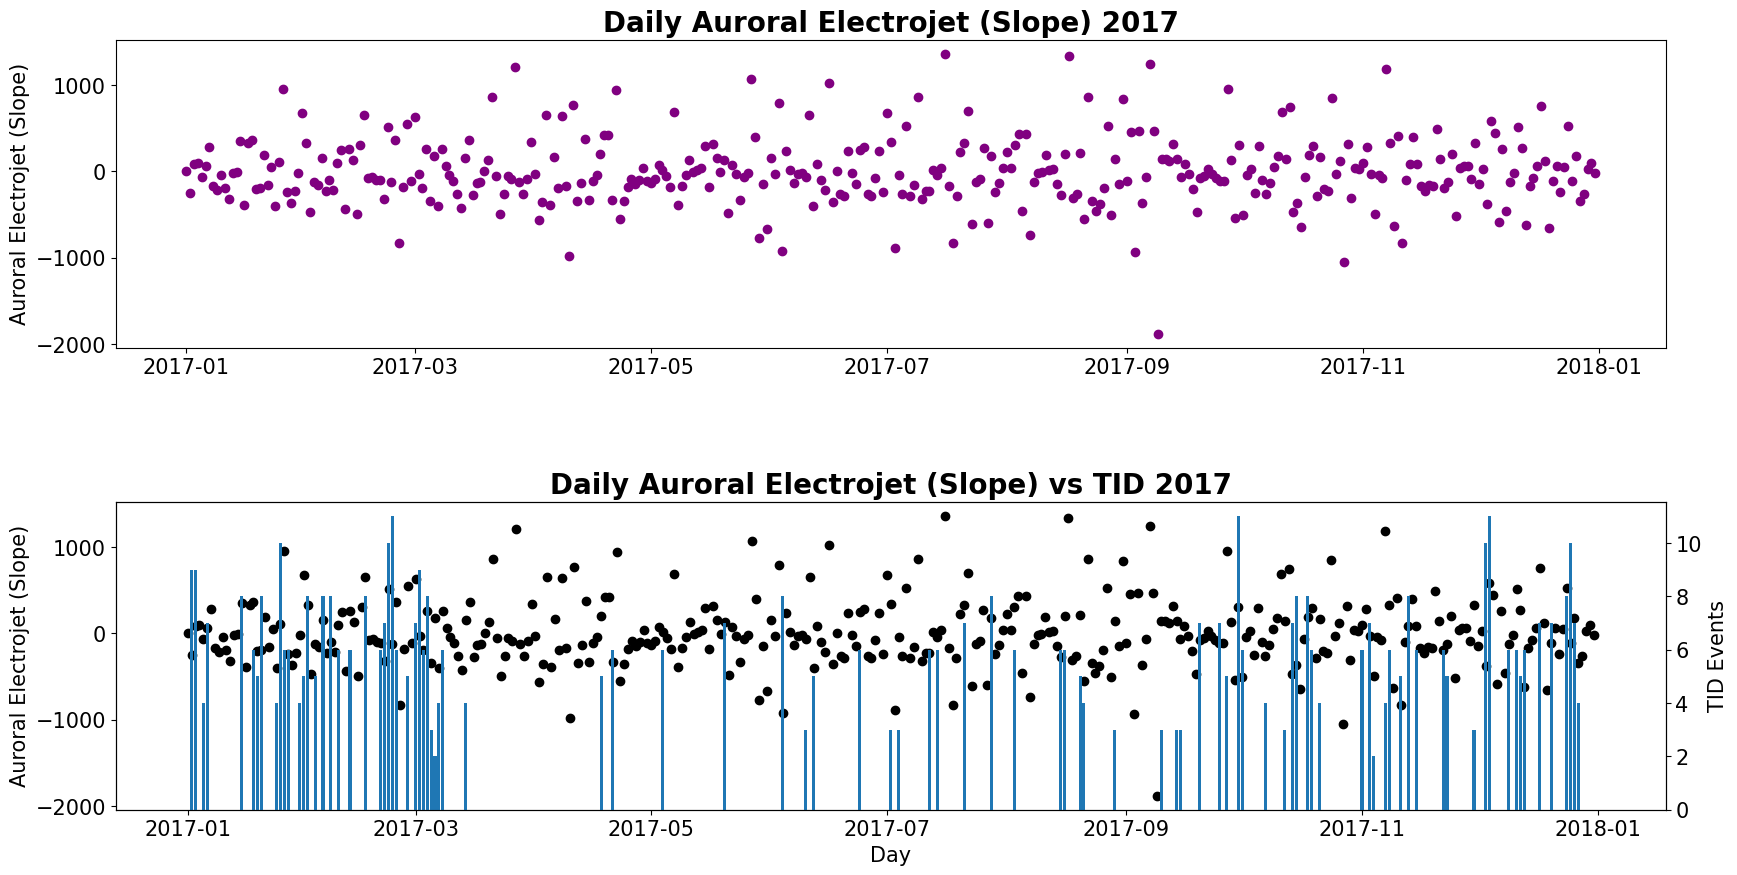

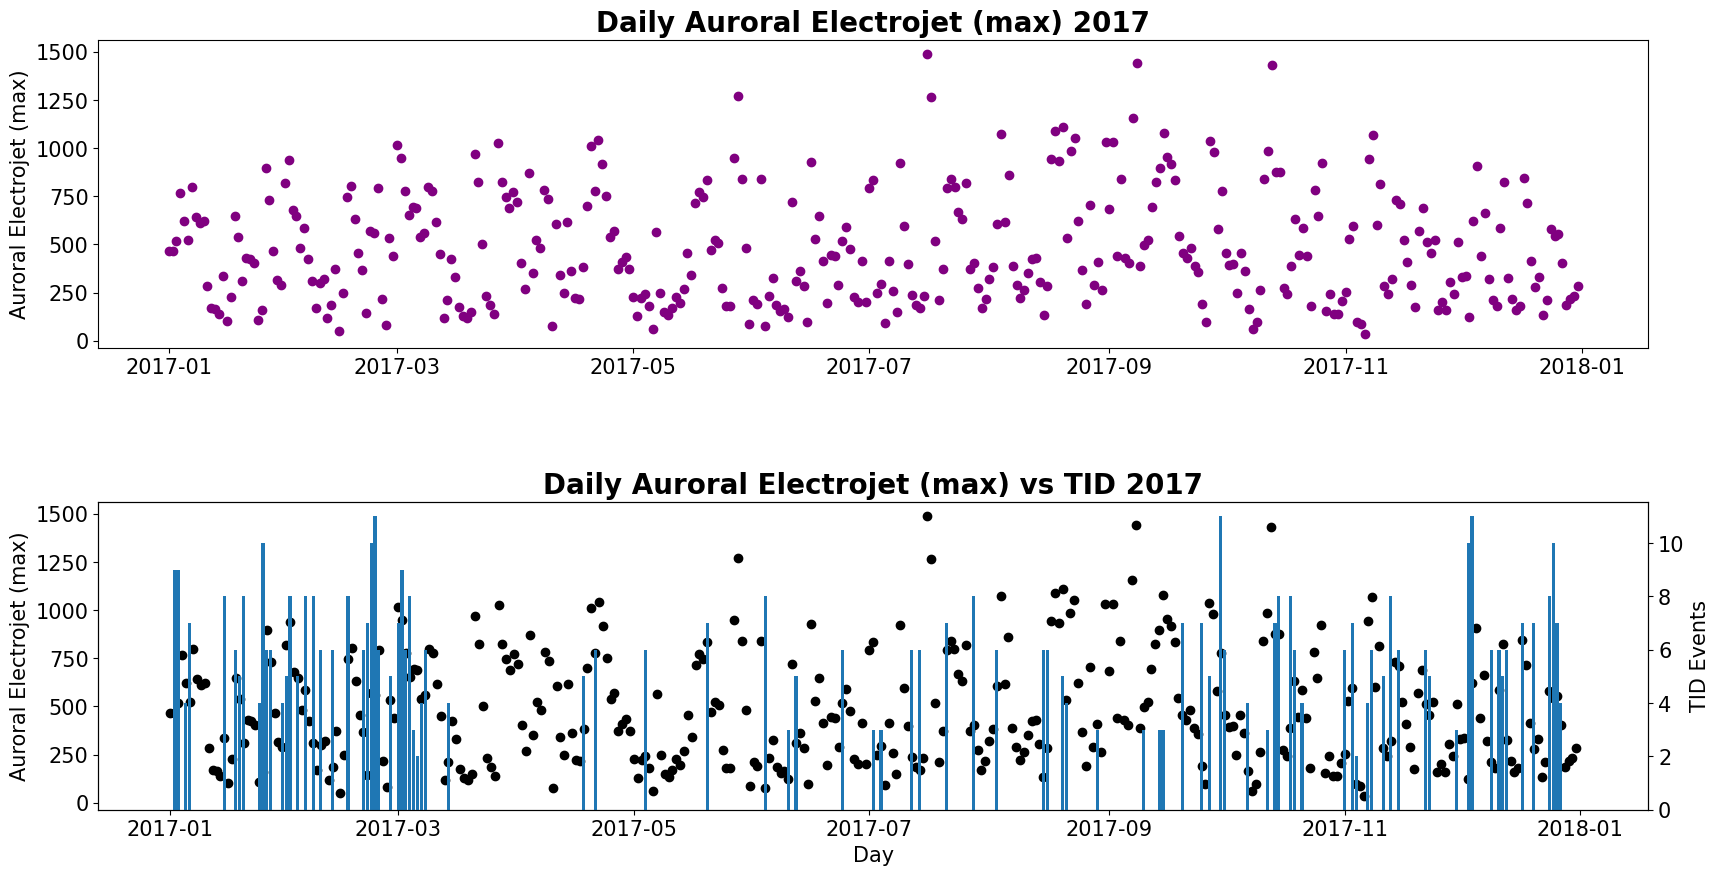

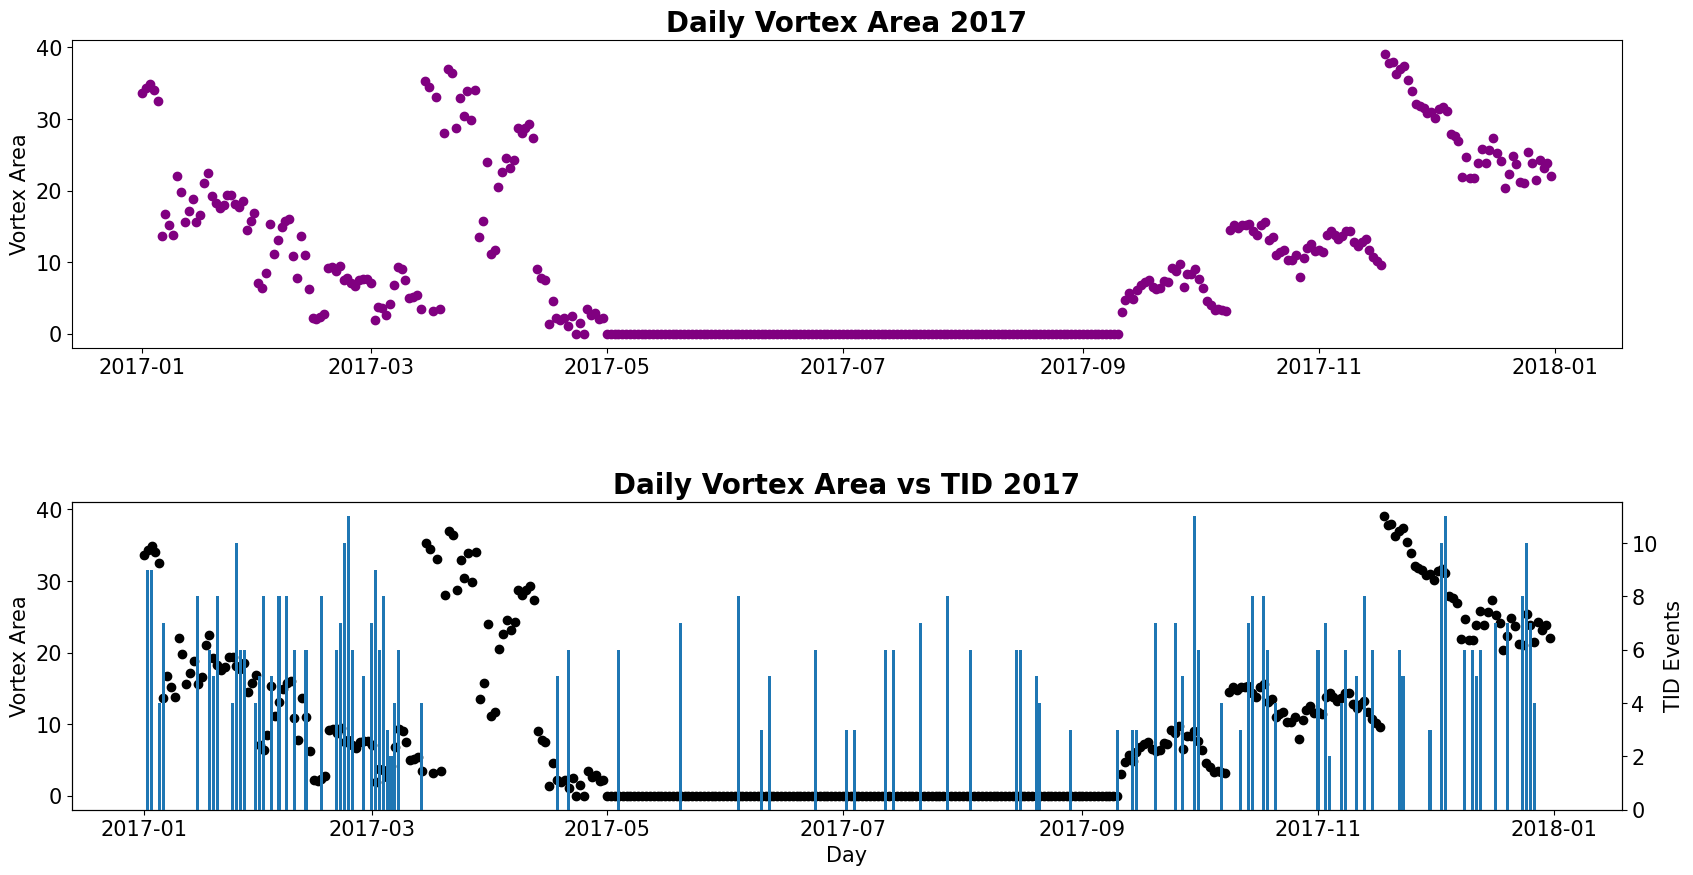

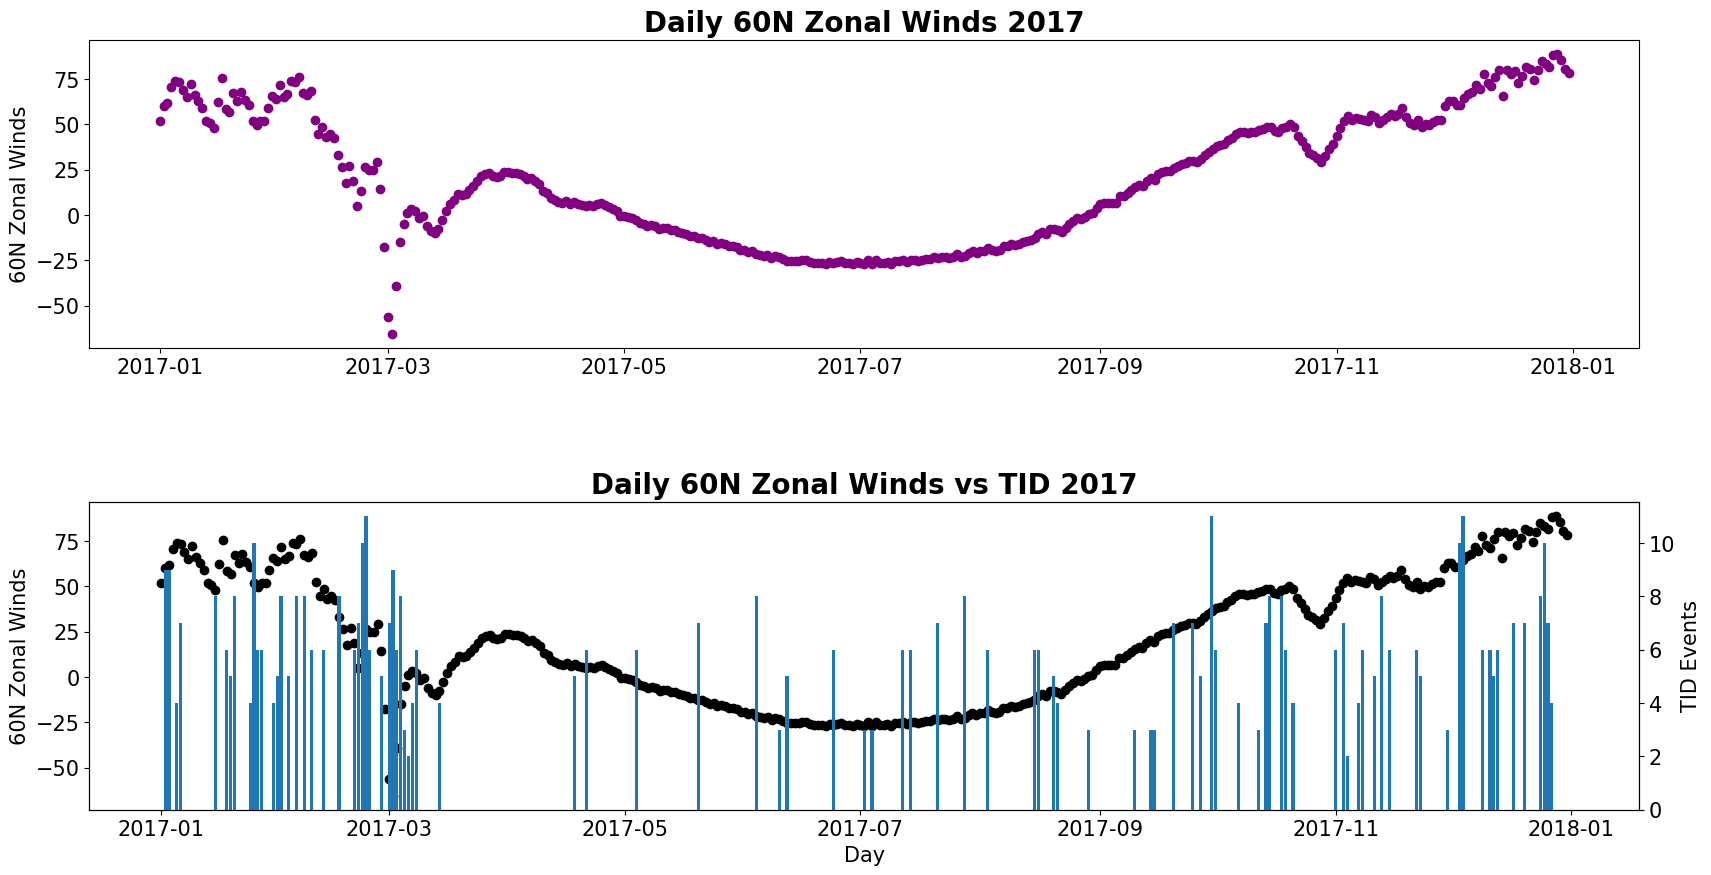

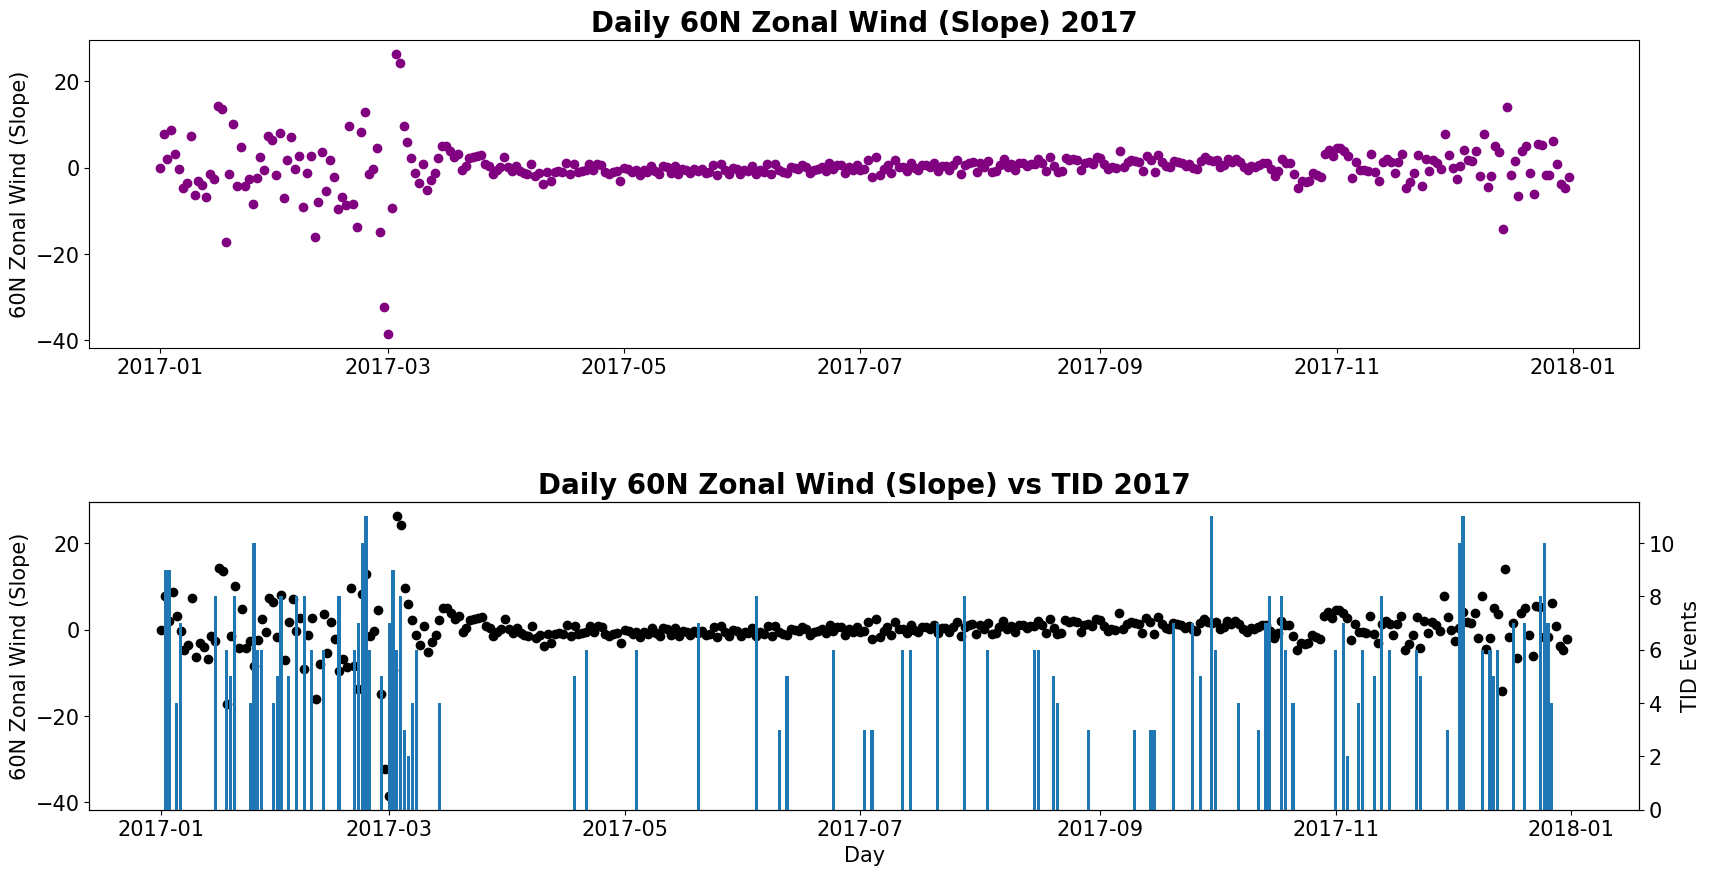

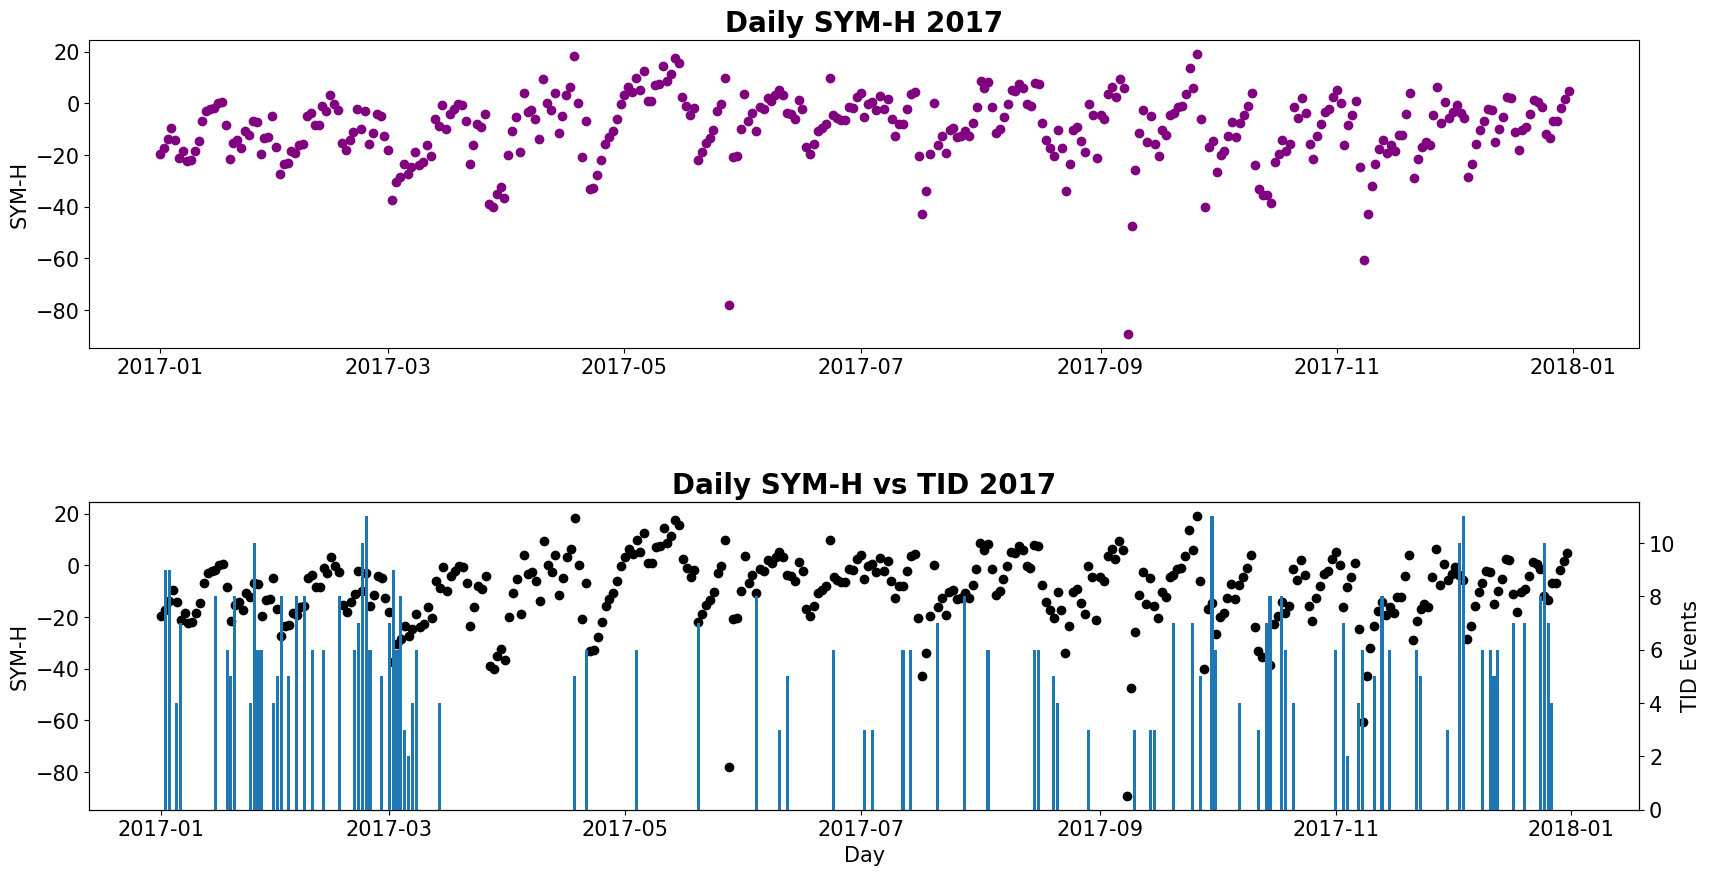

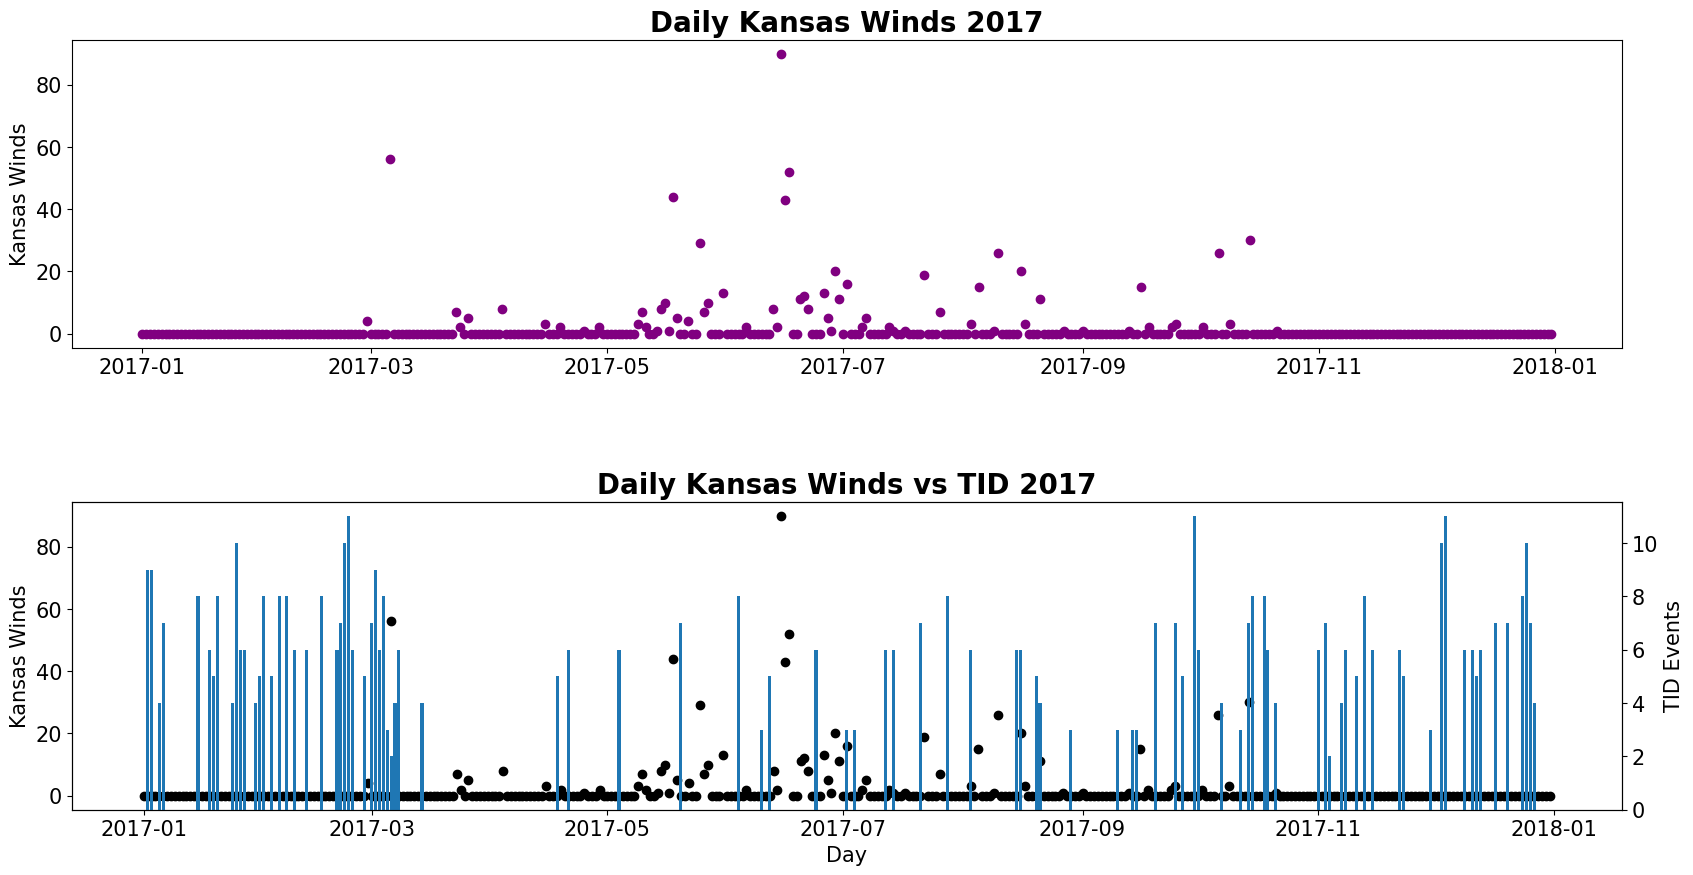

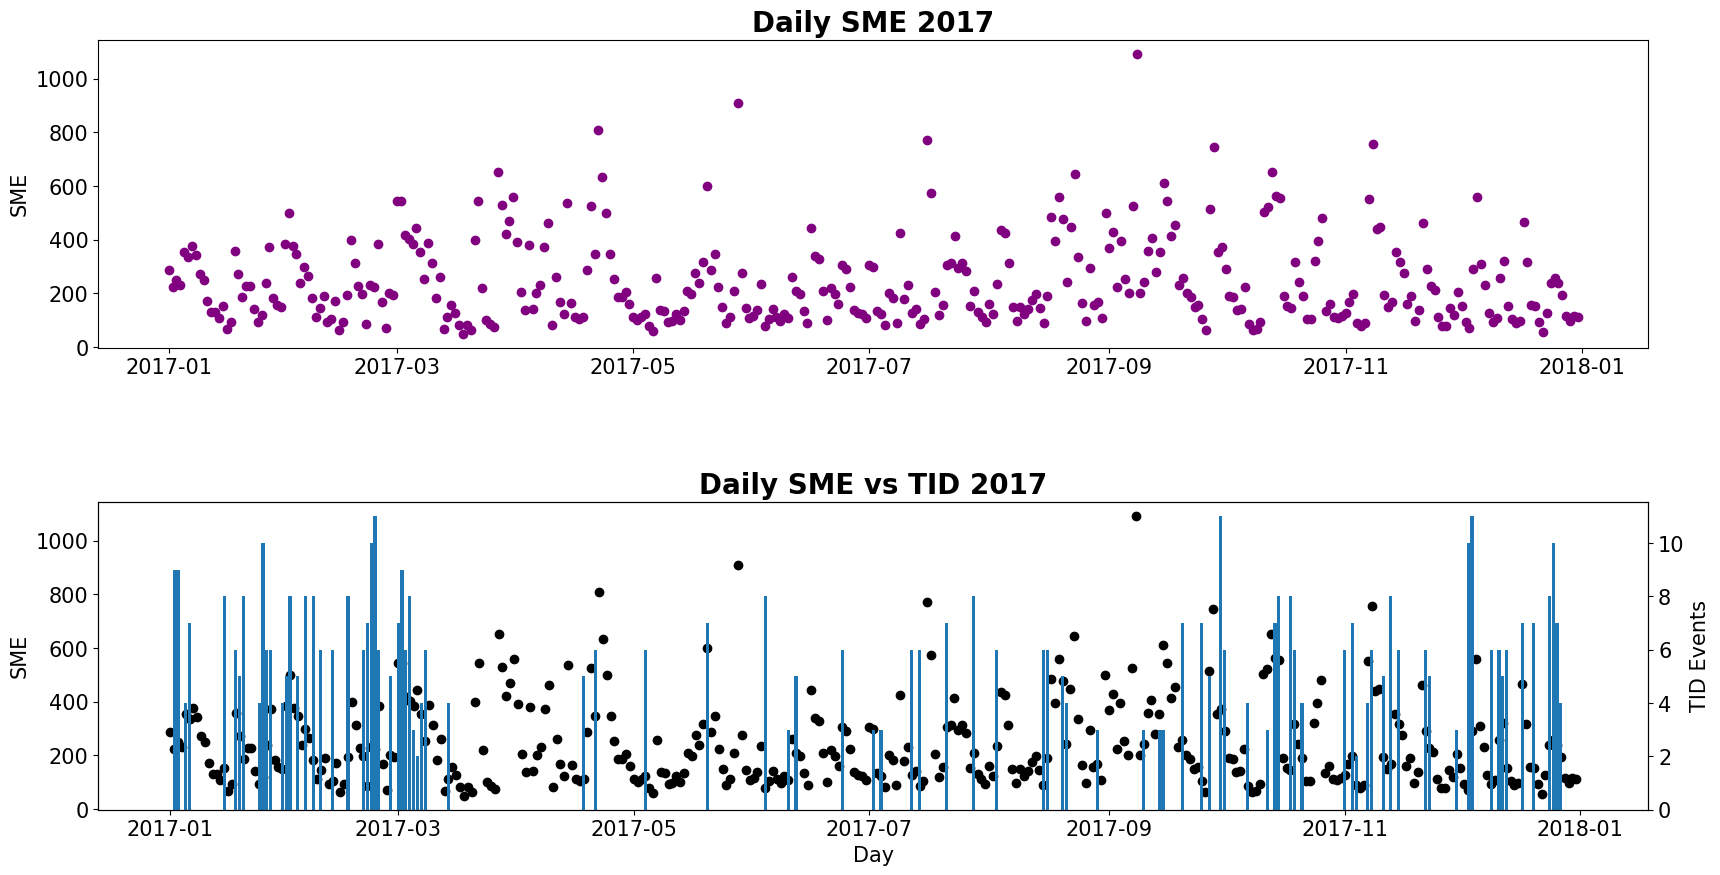

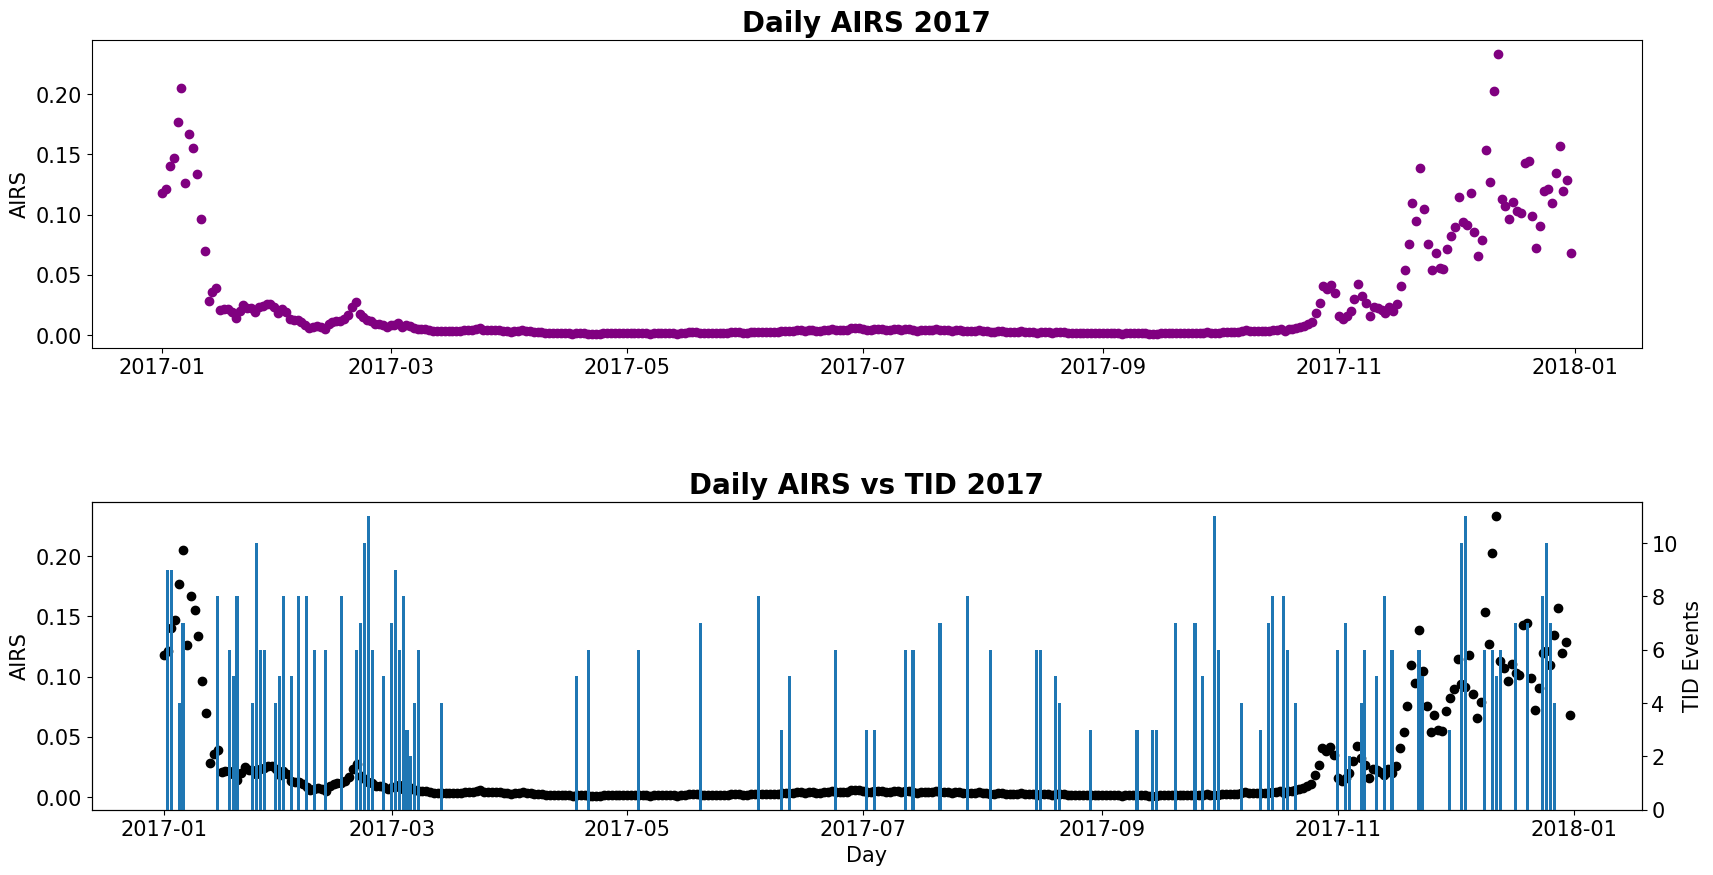

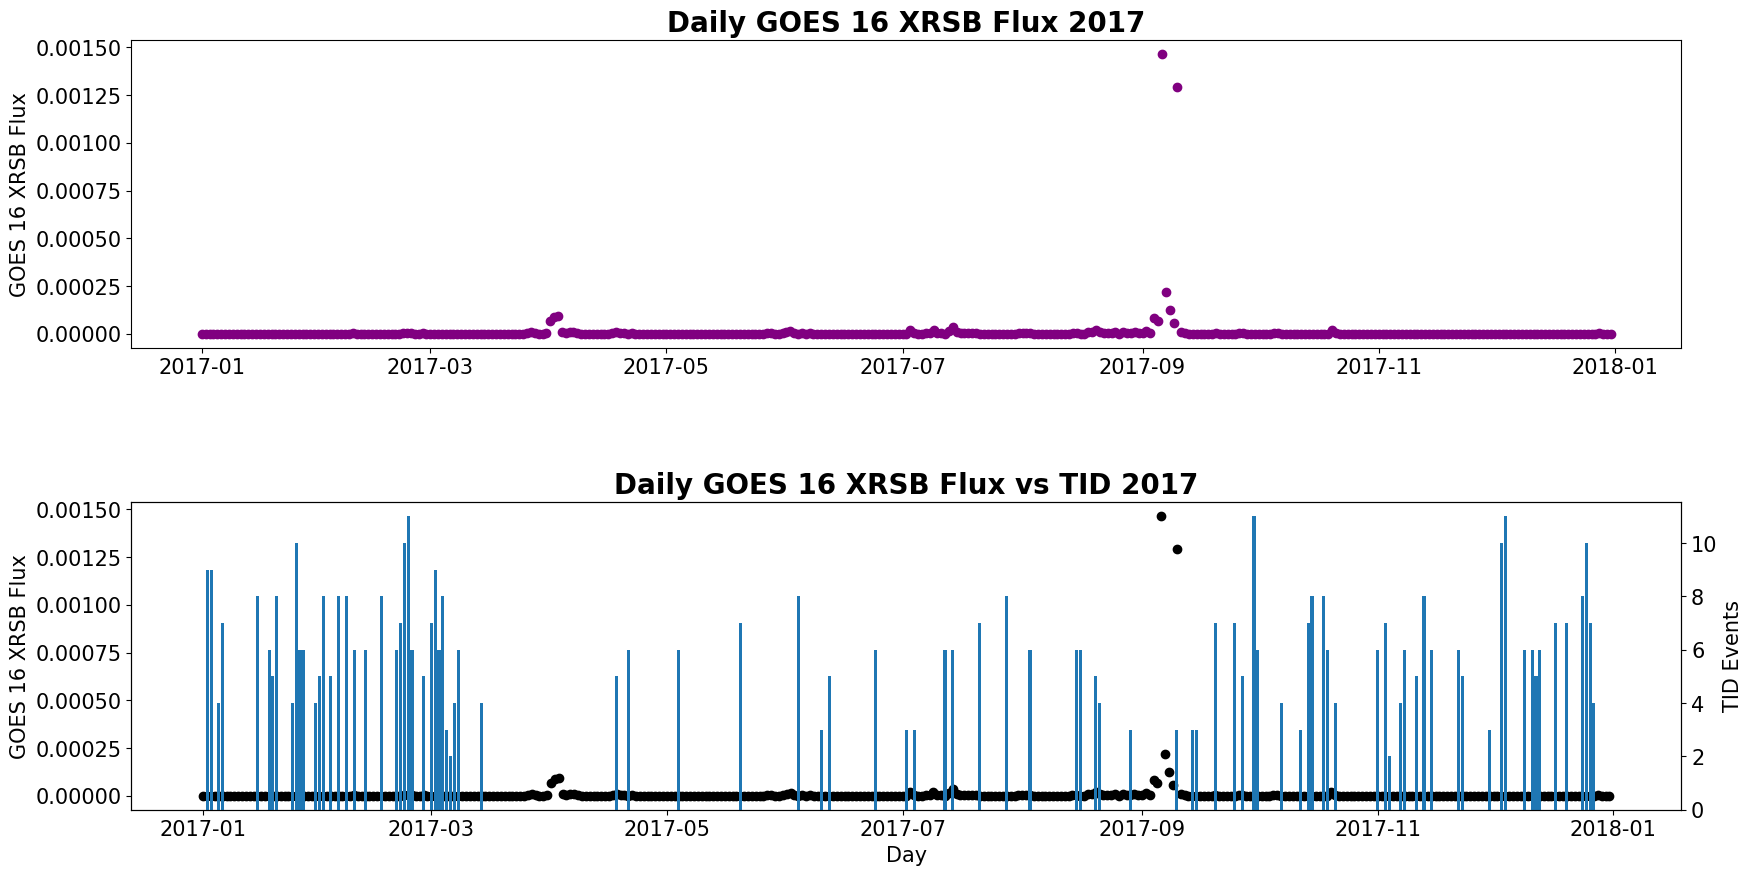

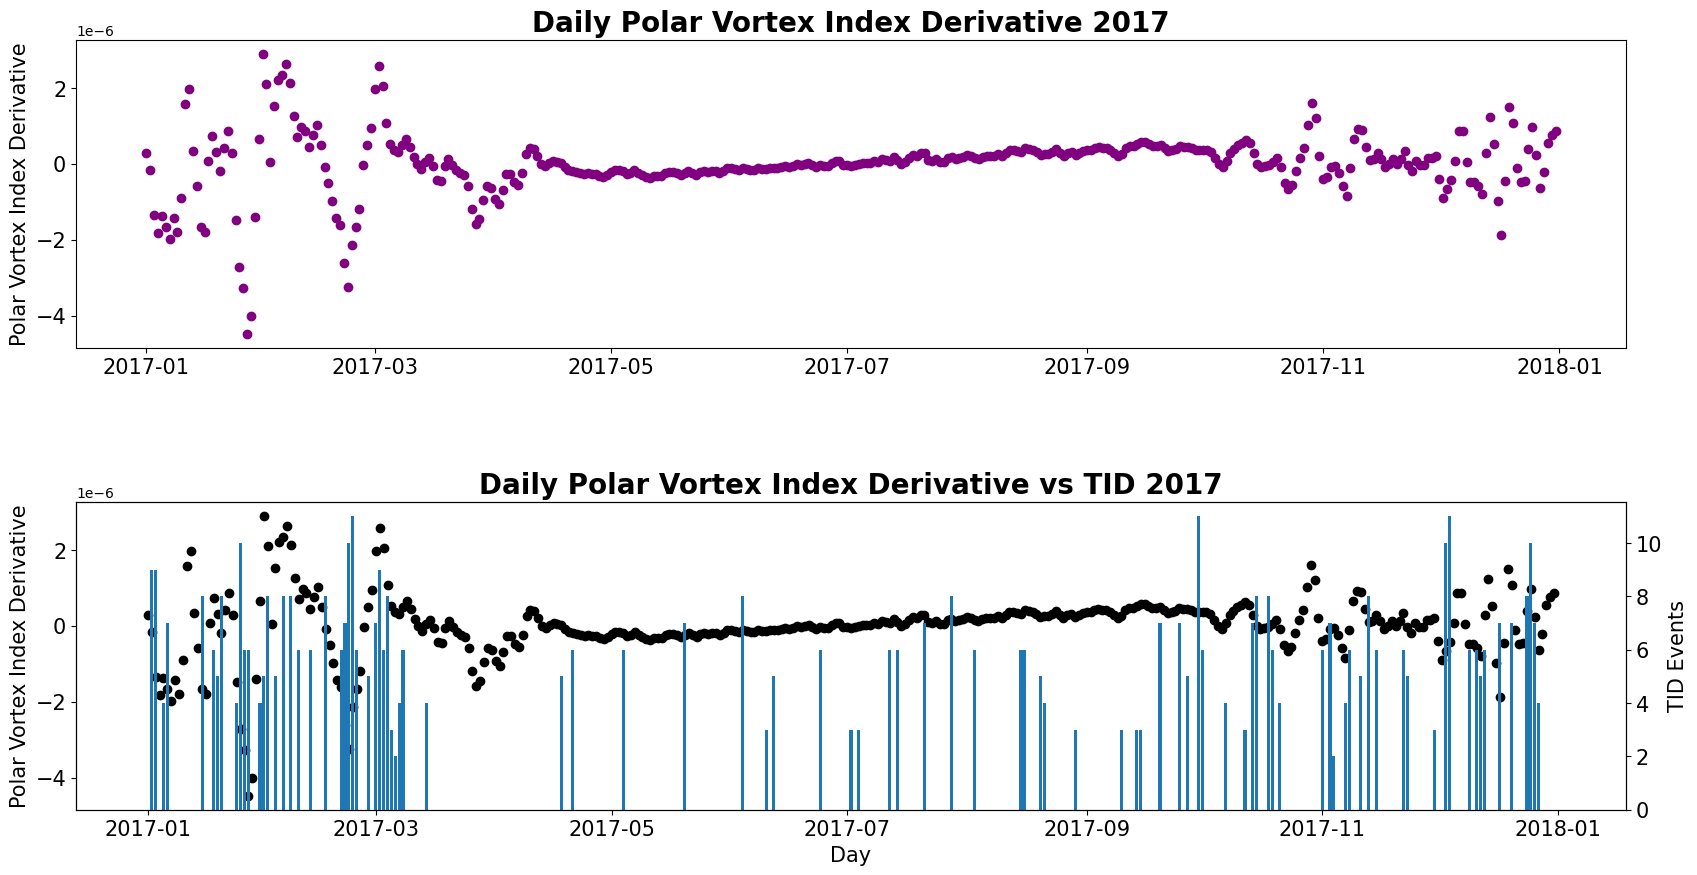

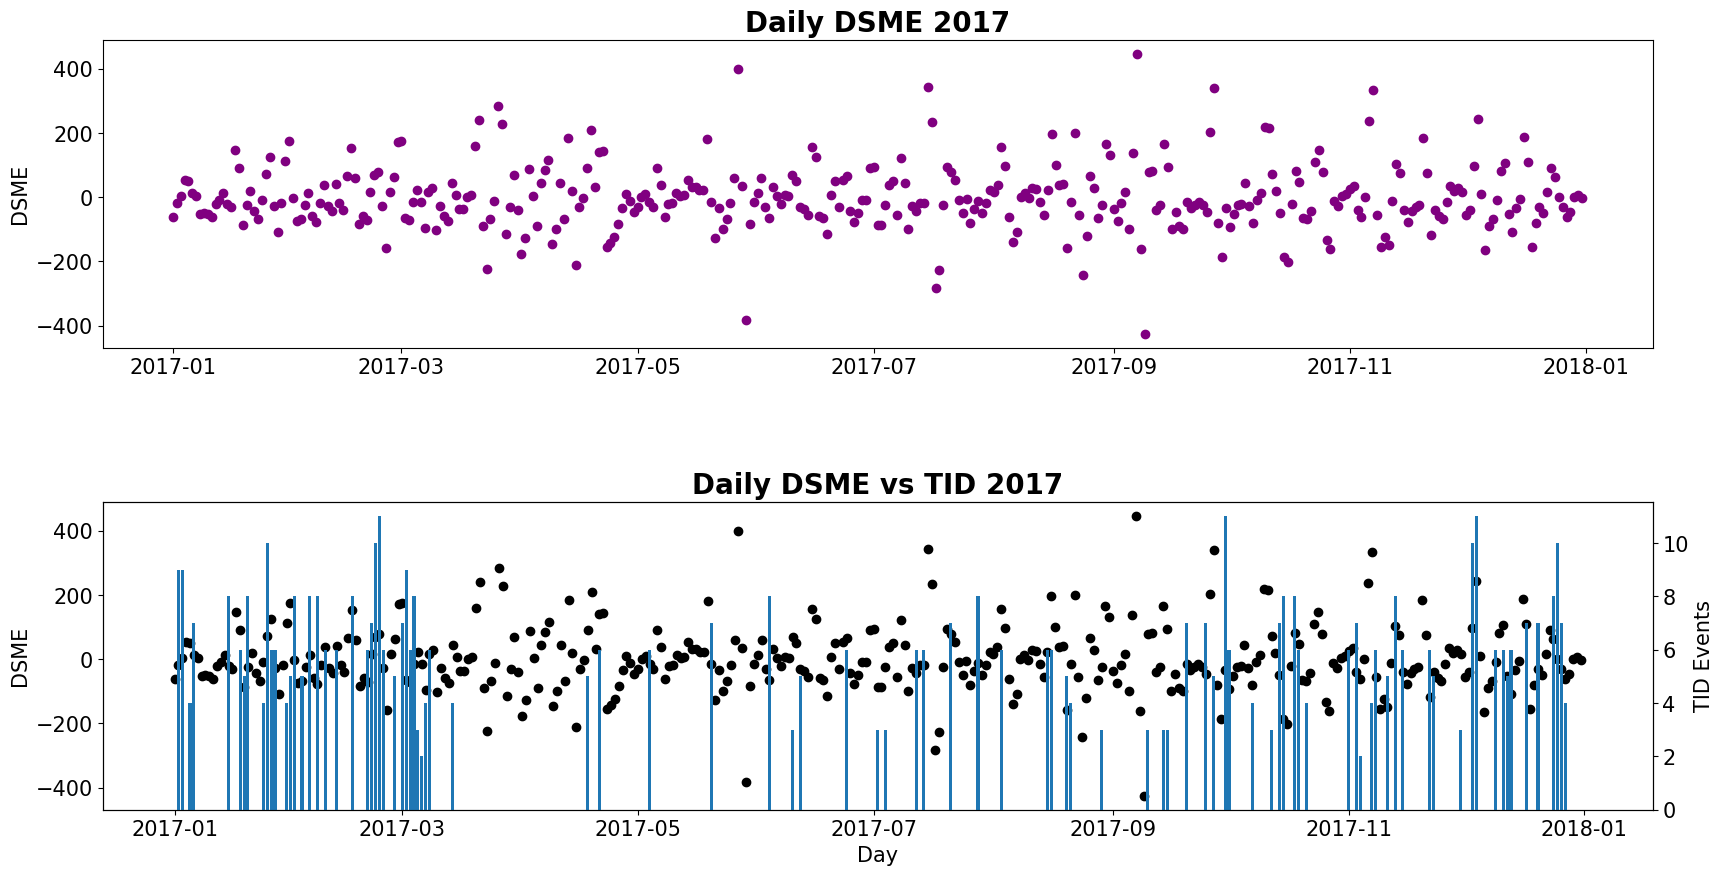

In [ ]:
# first run: identify filter values
column_names = data.columns.tolist()
# Iterating through two keys simultaneously
for driver in column_names:
  if driver == 'date':
    continue
  if driver == 'date_s':
    continue
  if driver == 'tid':
    continue
  if driver == 'Unnamed: 0':
    continue

  fig, axs = plt.subplots(2,1,figsize=(20,10))
  plt.subplots_adjust(hspace=0.5)

  oname = of_name(driver)

  axs[0].scatter(data['date'], data[driver], color = 'purple')
  axs[0].set_title('Daily '+ str(oname) +' 2017', fontsize = 20,fontweight = 'bold')
  axs[0].set_ylabel(oname,fontsize = 15)
  axs[0].tick_params(labelsize = 15)

  axs[1].scatter(data['date'], data[driver], color = 'black')
  ax2 = axs[1].twinx()
  ax2.bar(data['date'], data['tid'])
  axs[1].set_title('Daily '+str(oname)+' vs TID 2017', fontsize = 20,fontweight = 'bold')
  axs[1].set_ylabel(oname,fontsize = 15)
  axs[1].set_xlabel('Day',fontsize = 15)
  axs[1].tick_params(labelsize = 15)
  ax2.set_ylabel('TID Events',fontsize = 15)
  ax2.tick_params(labelsize = 15)

  fig.savefig(drive_loc + 'filter_value_finder/'+str(oname)+'.png')


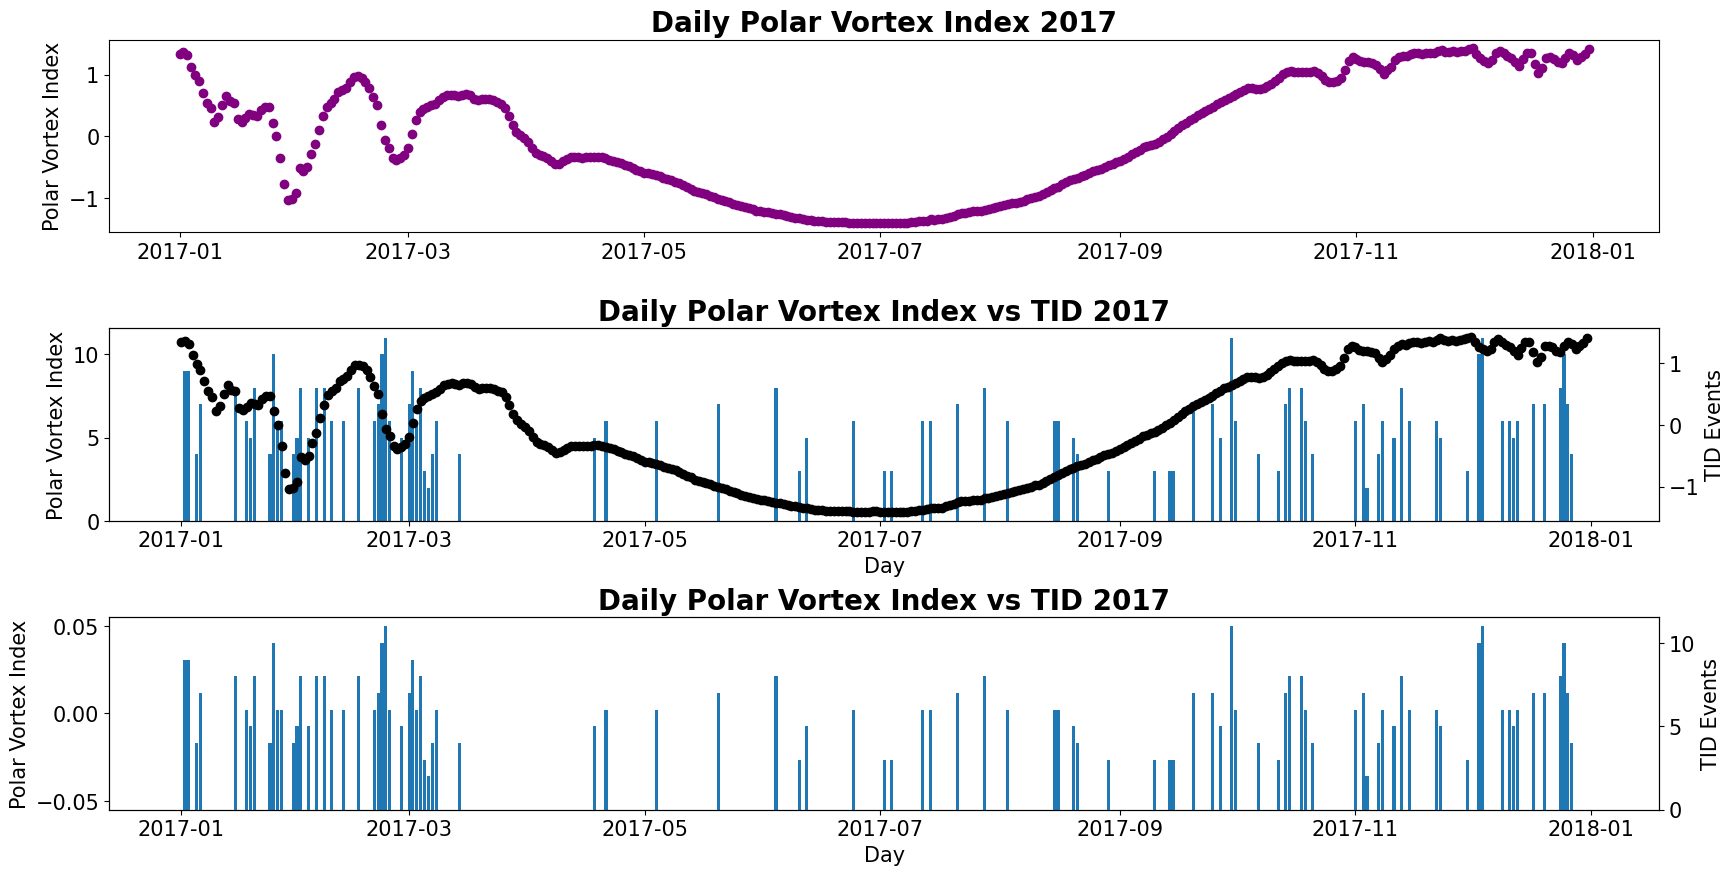

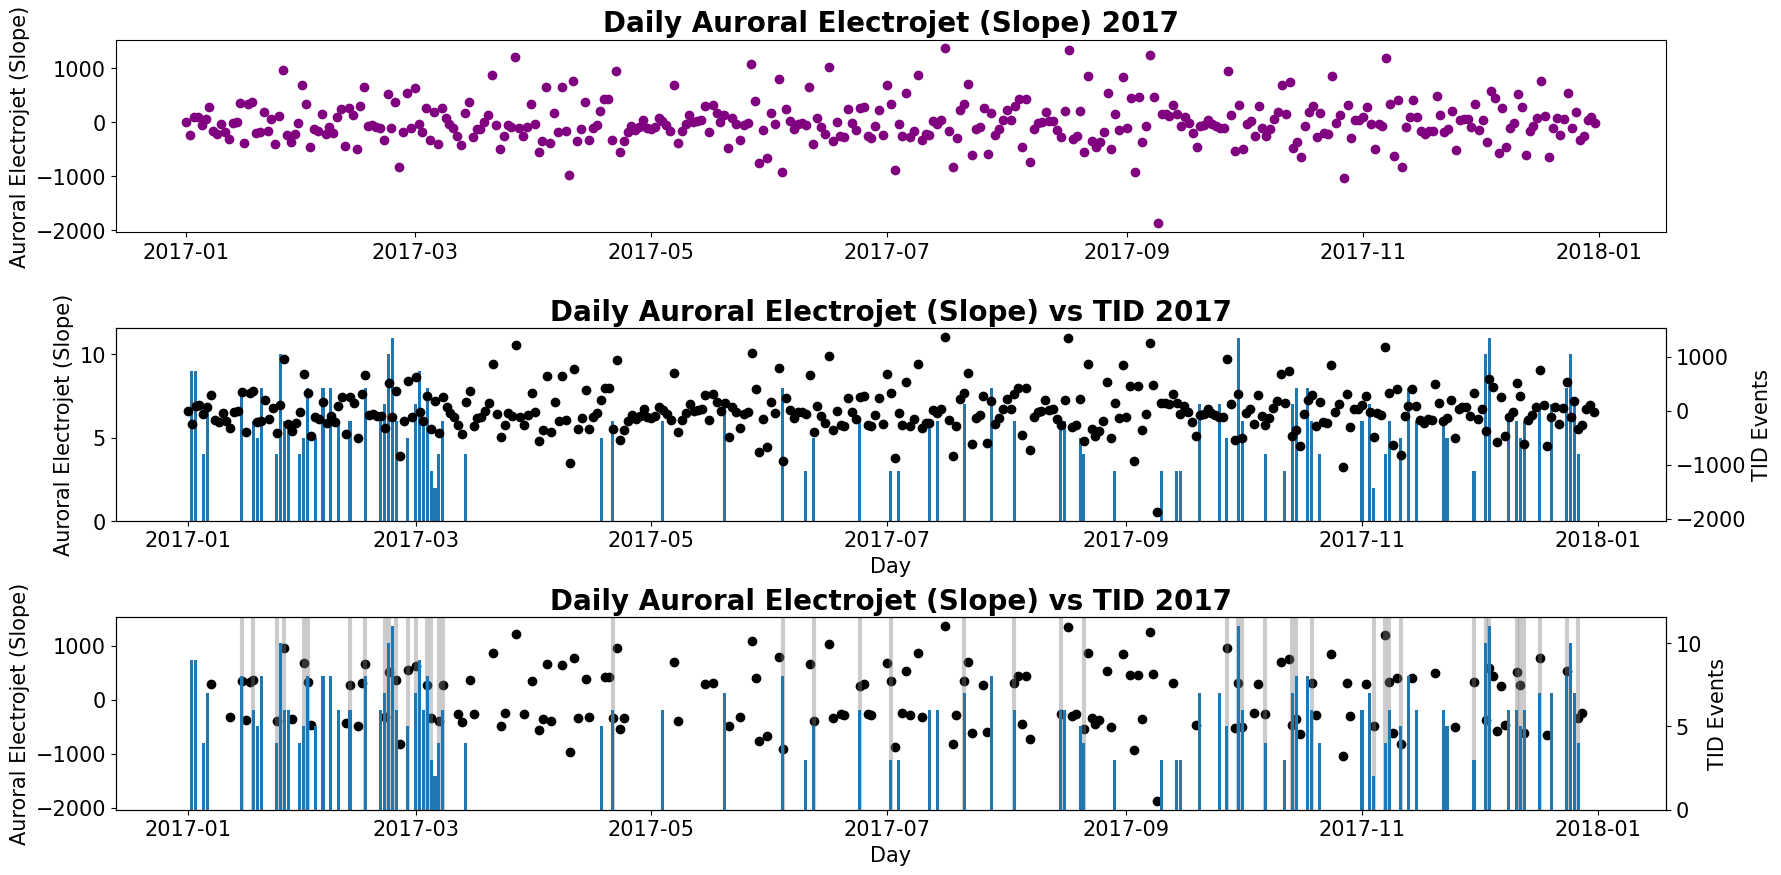

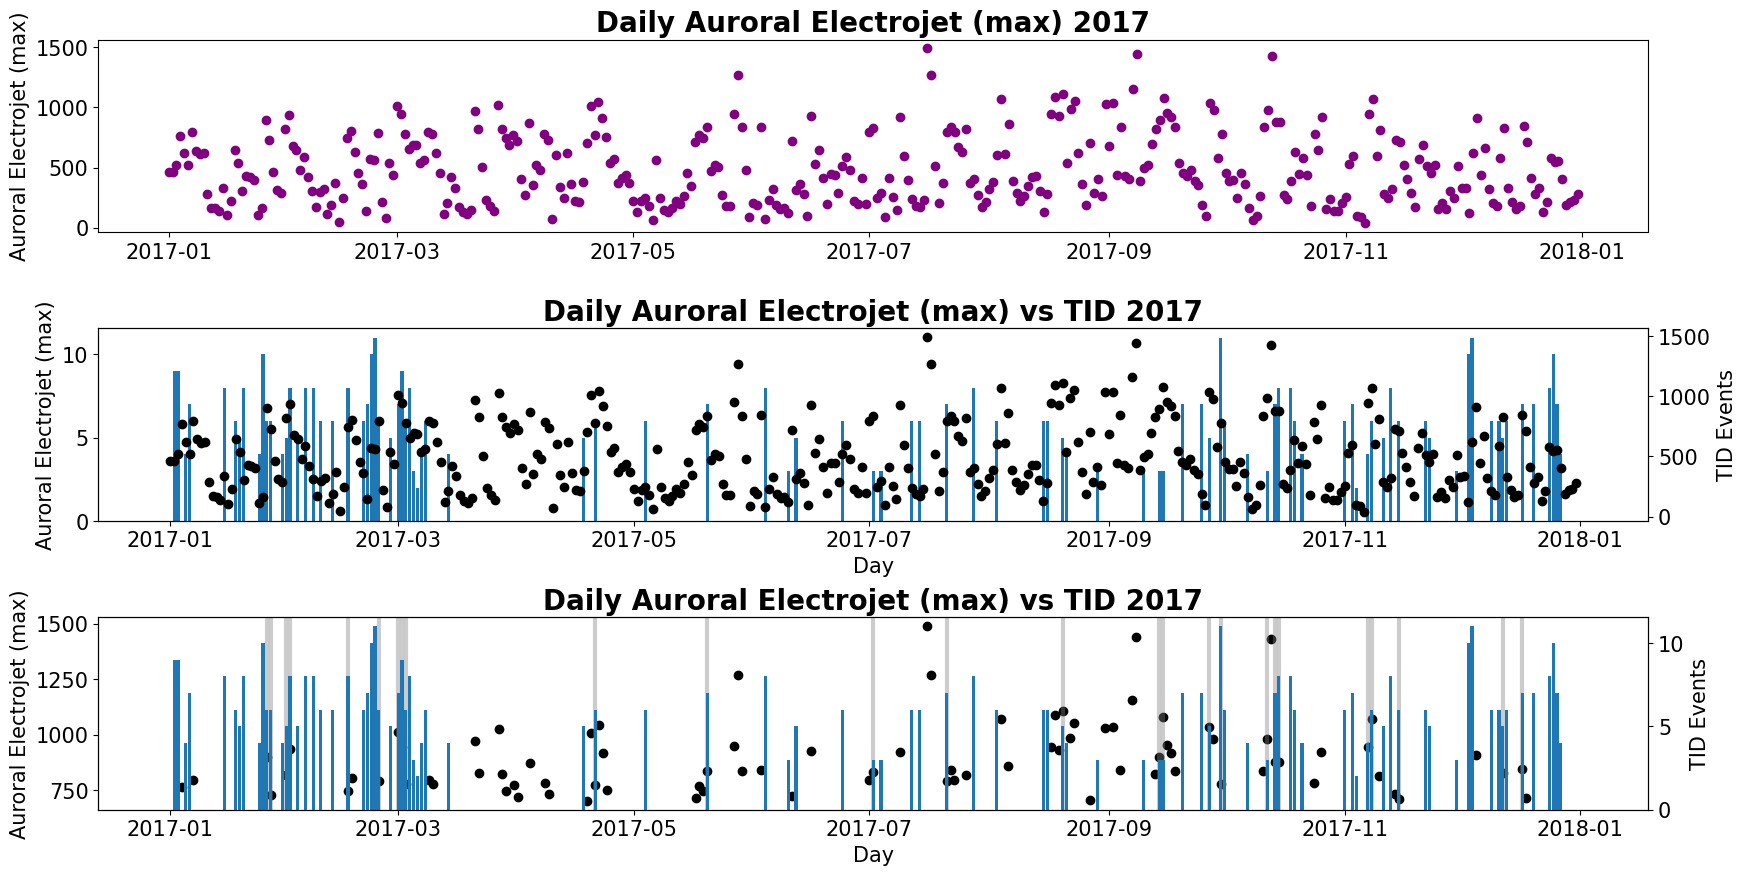

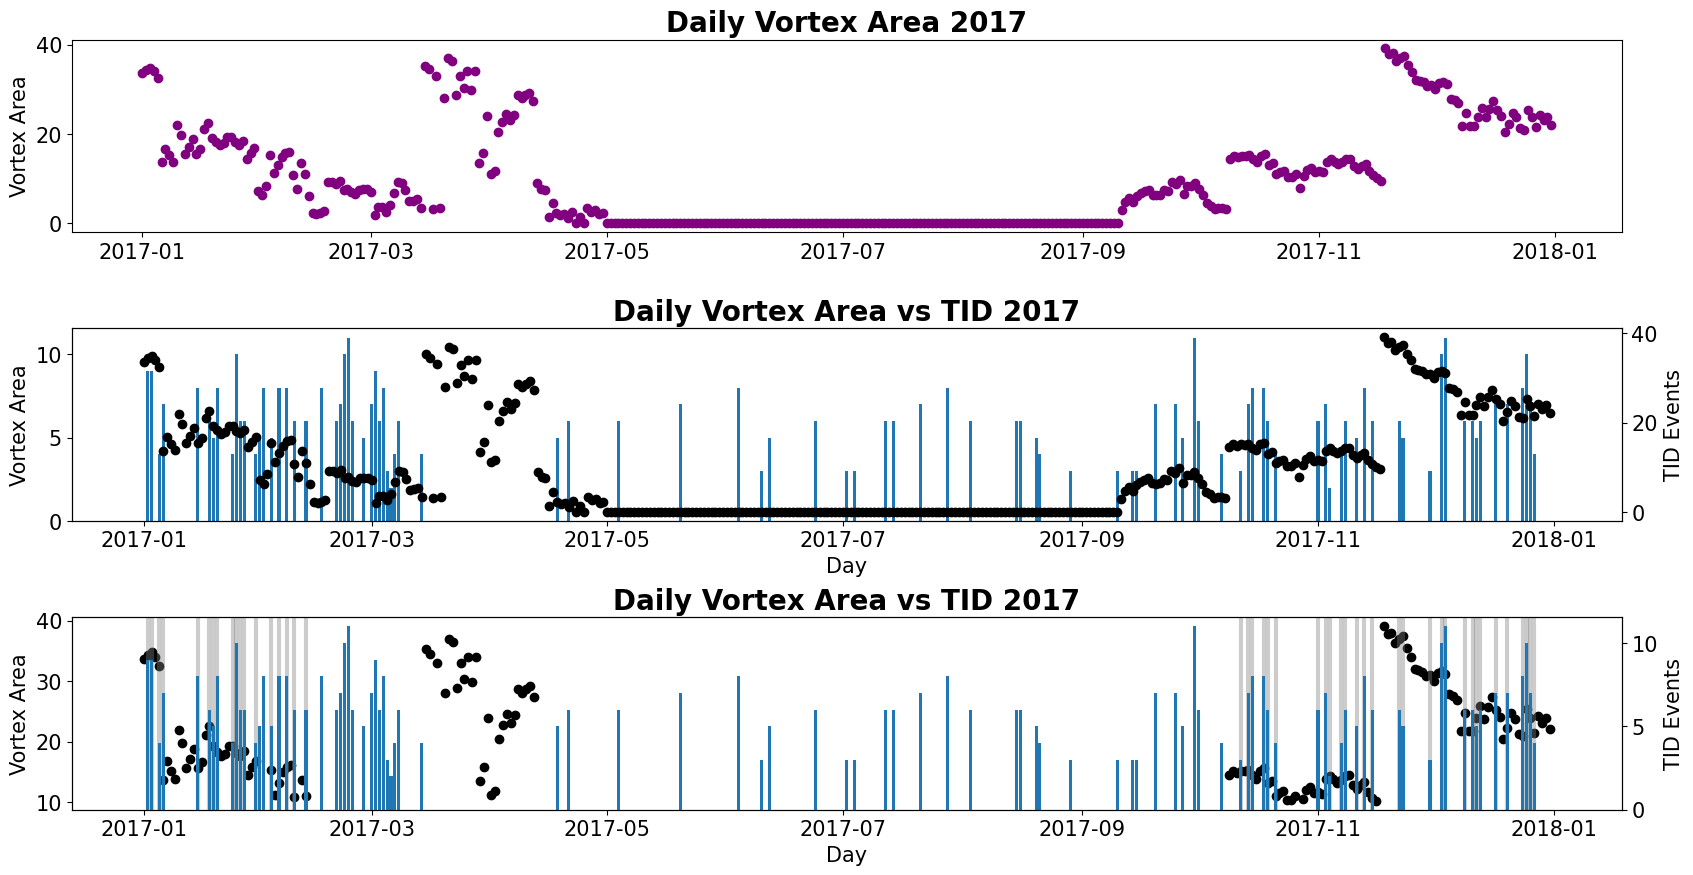

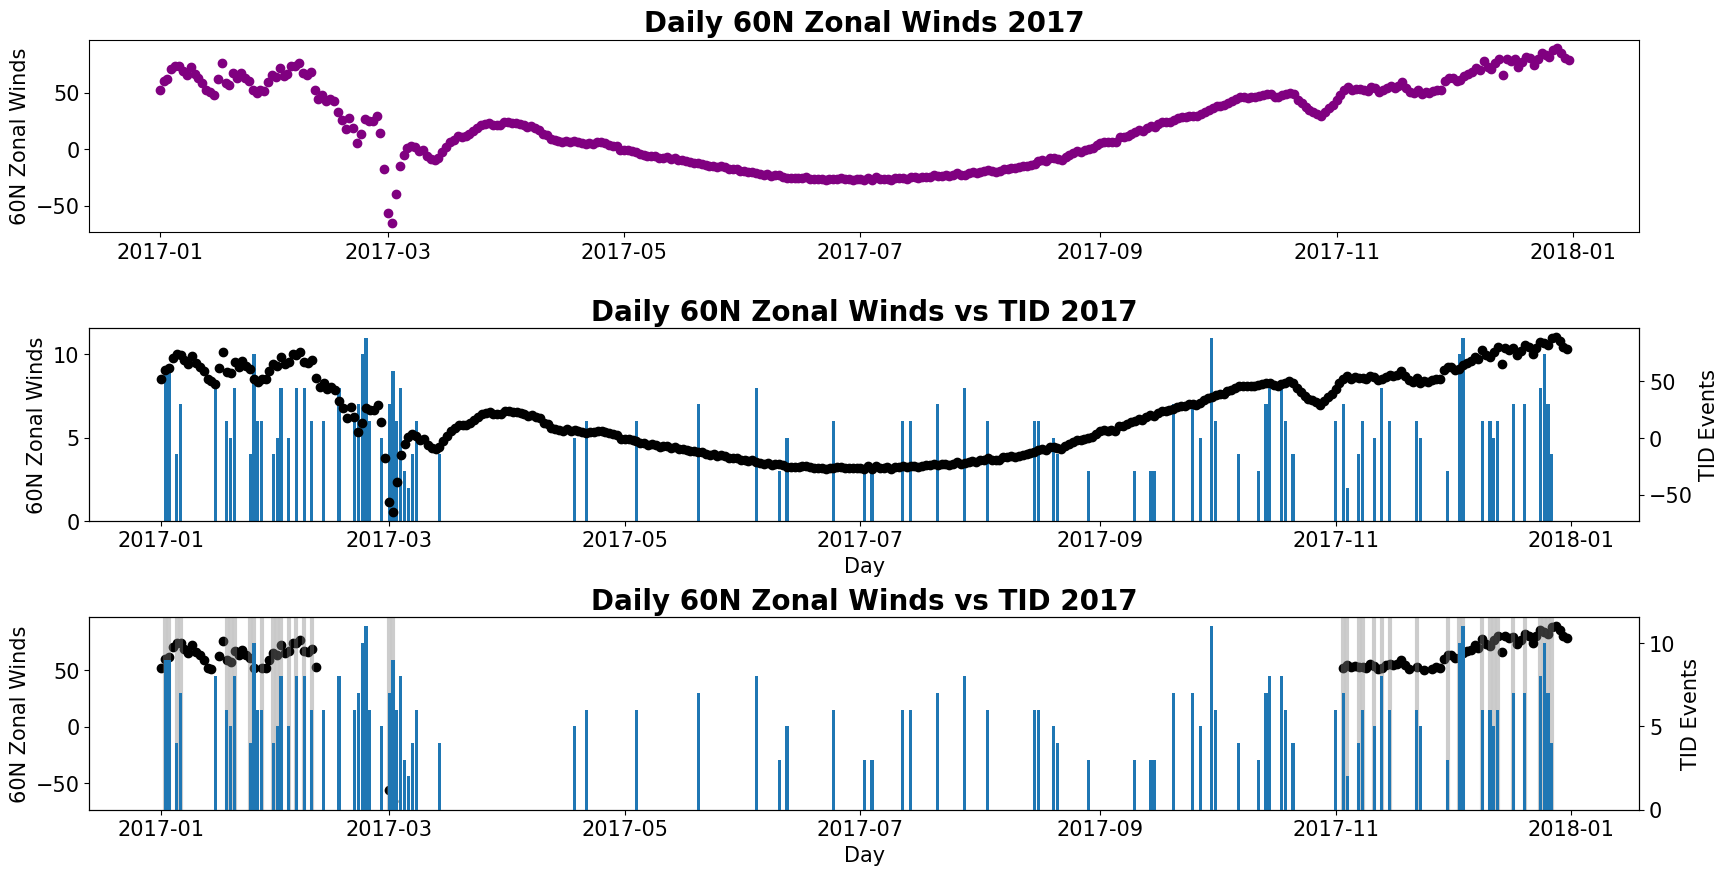

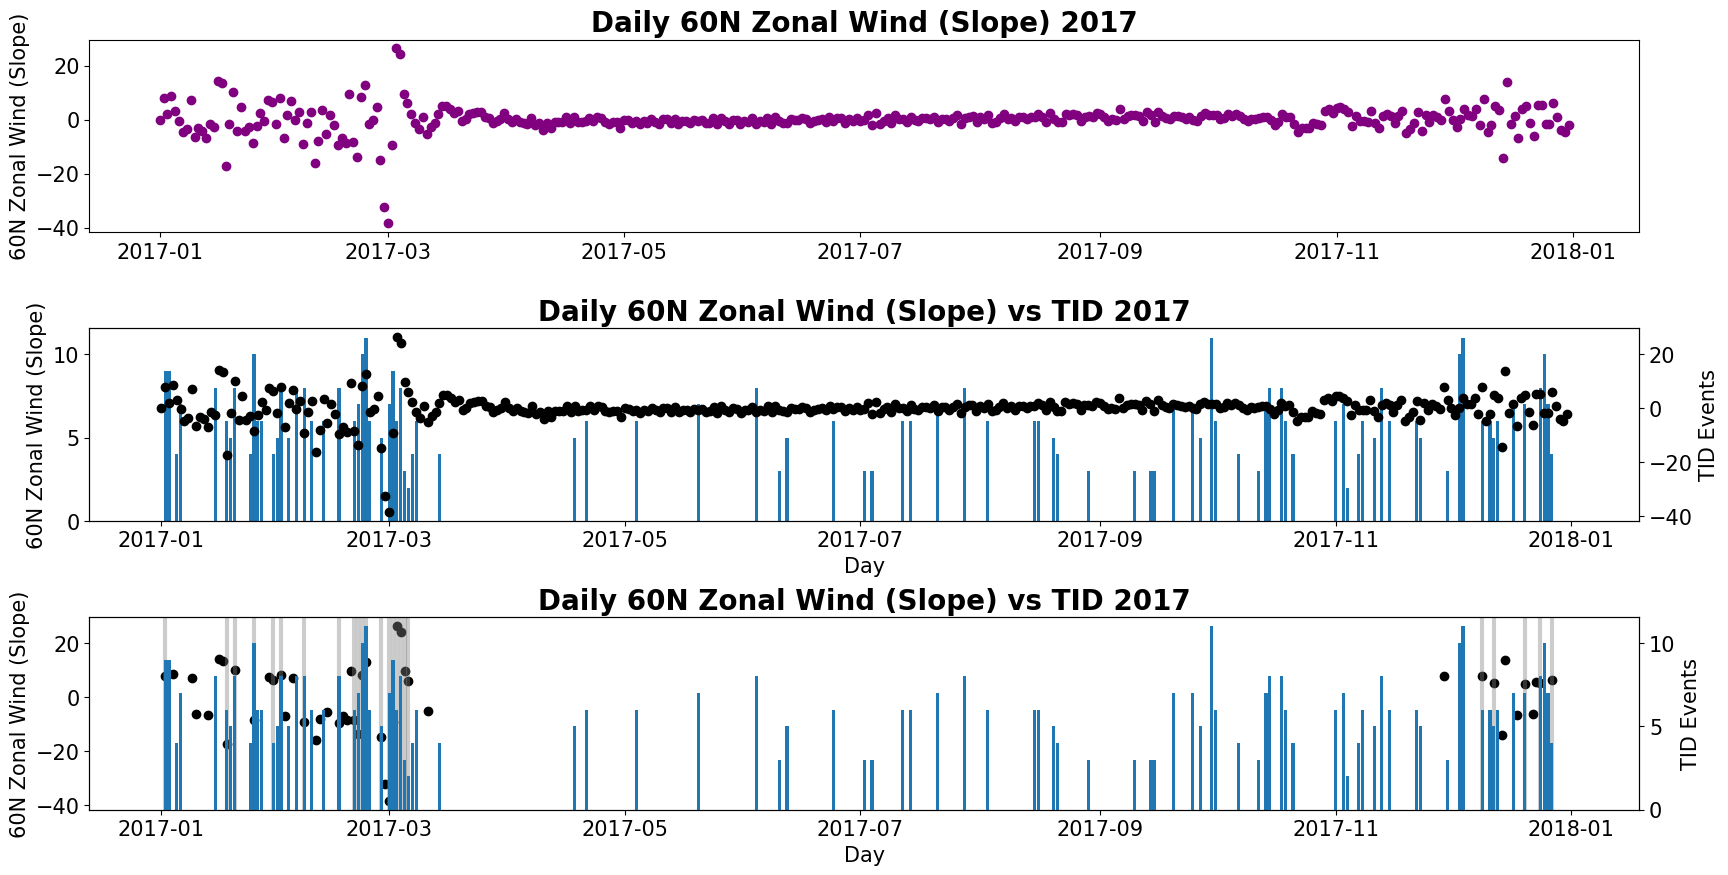

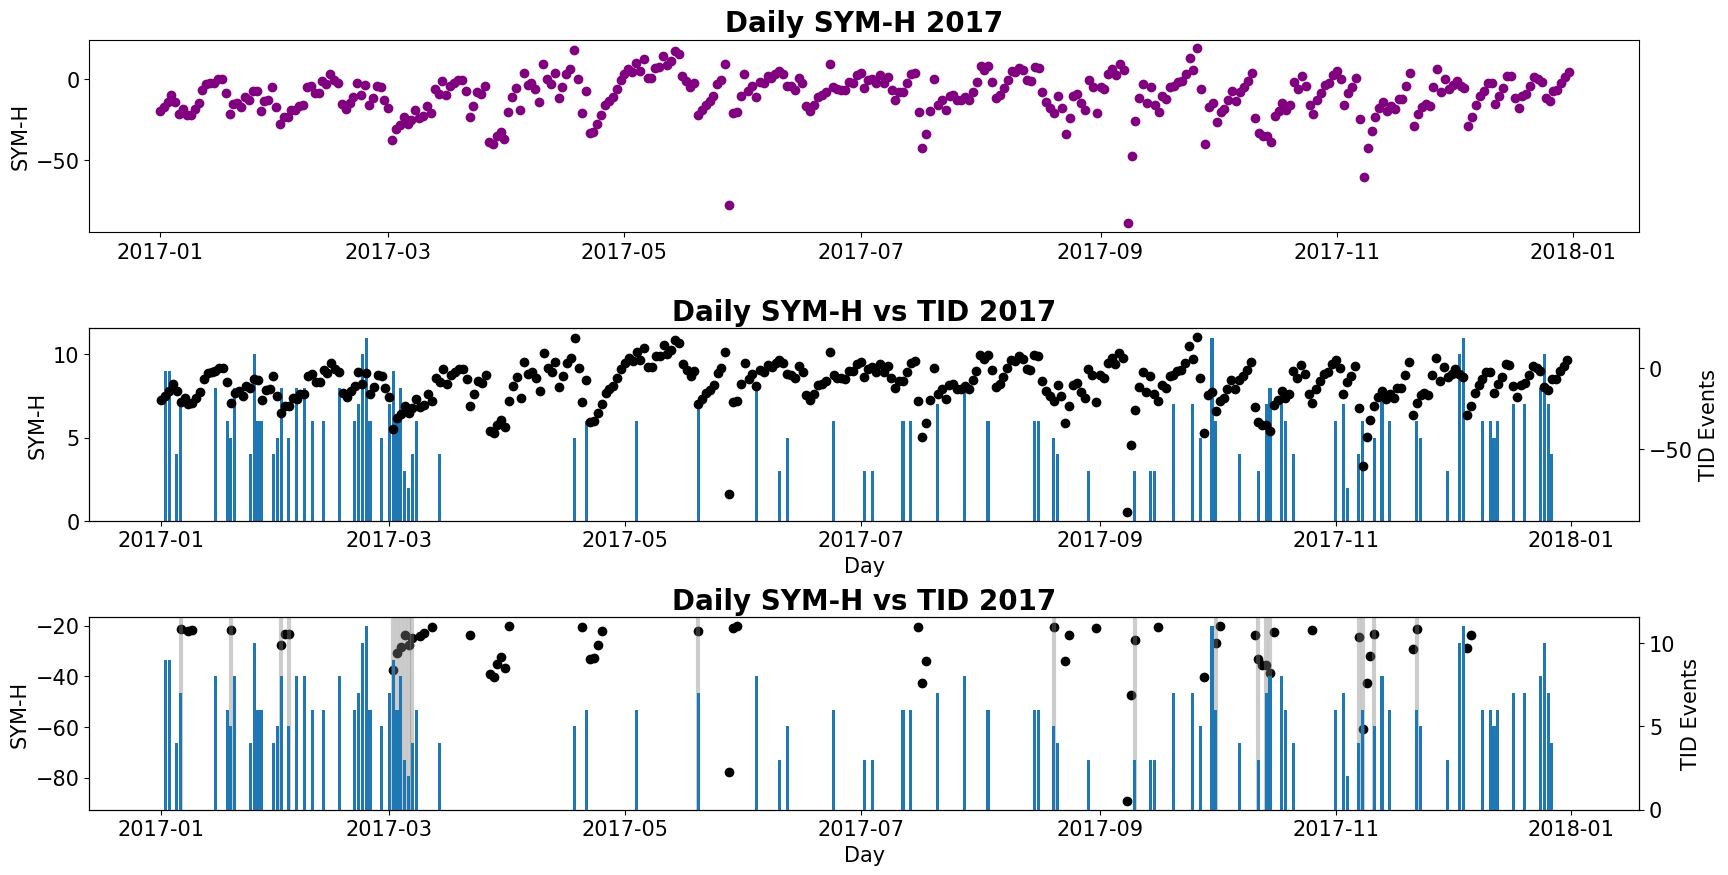

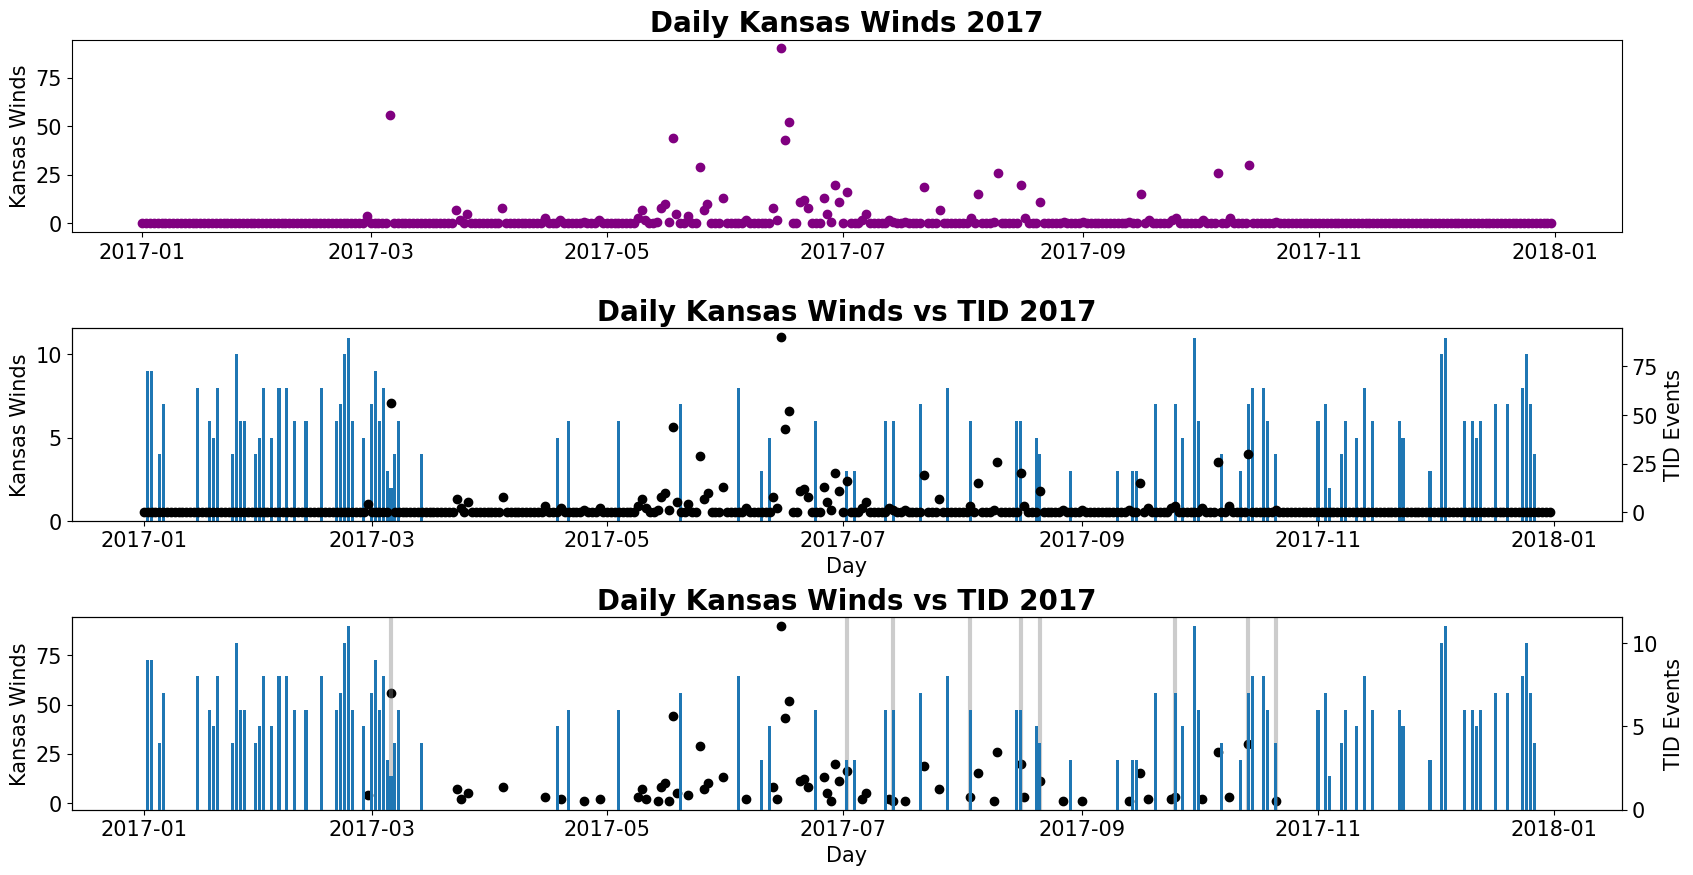

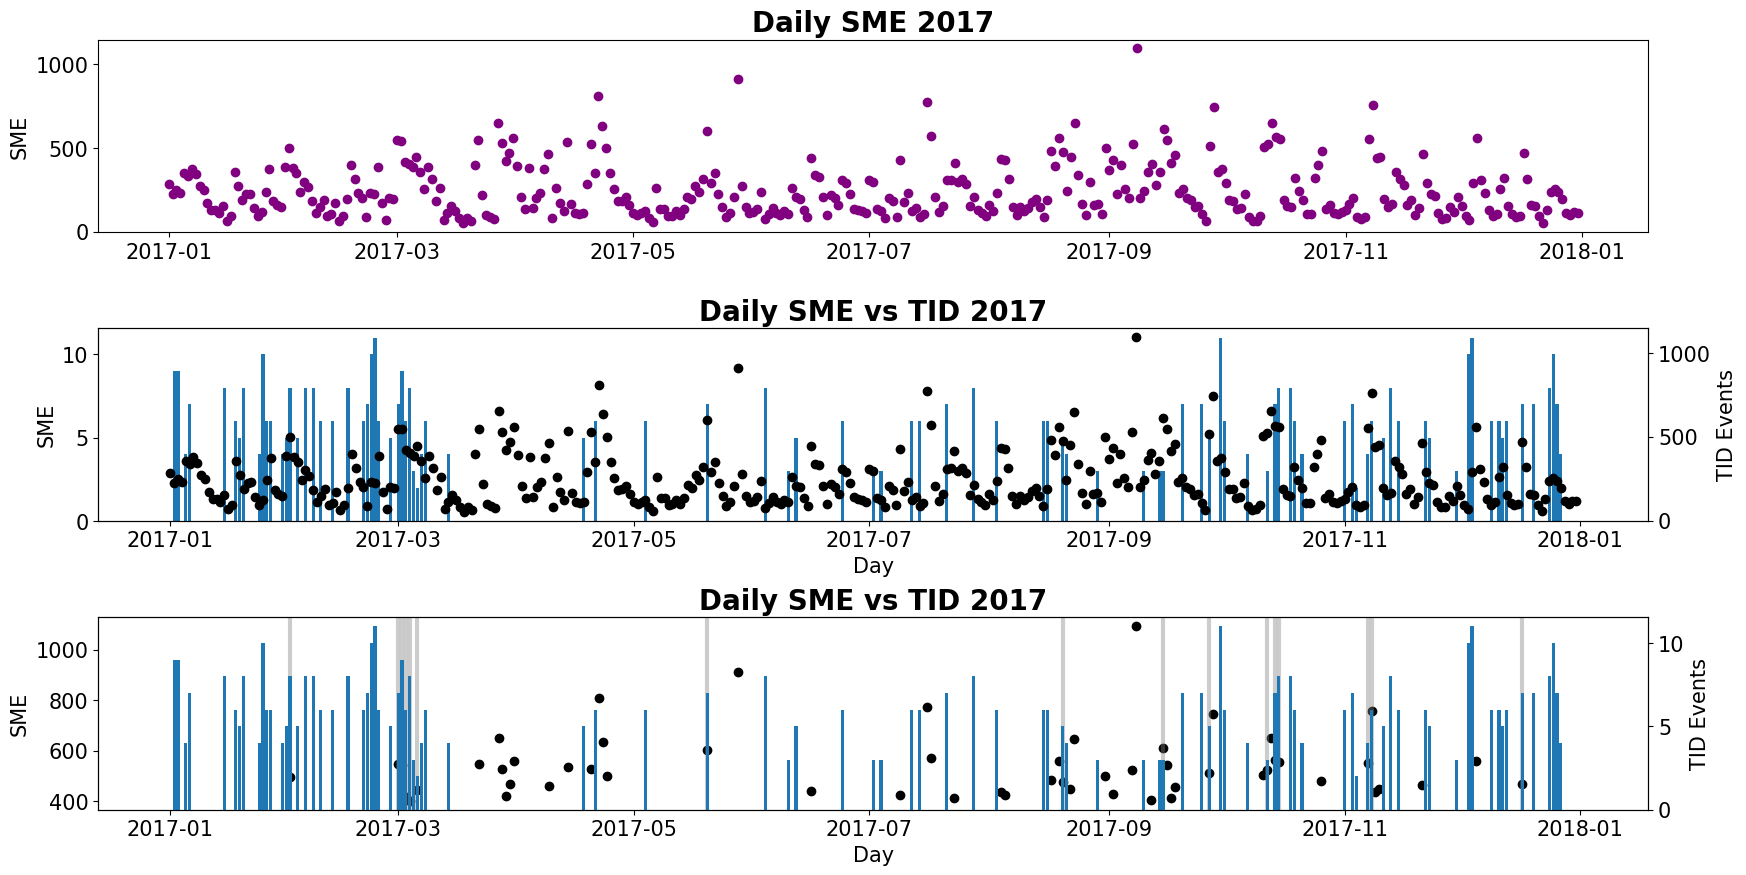

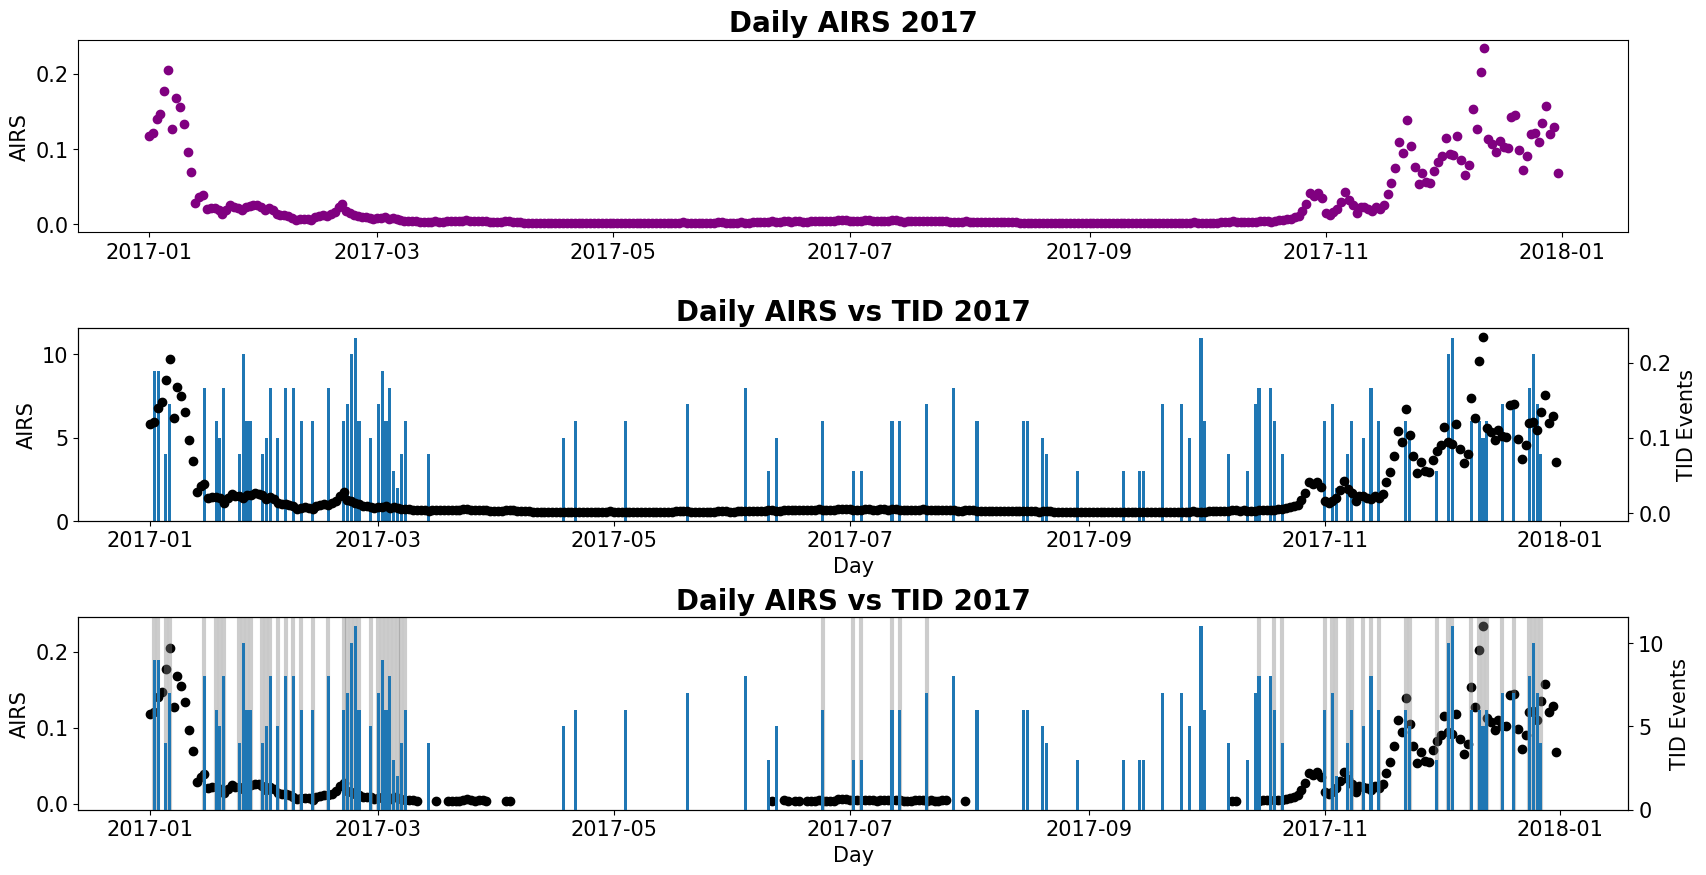

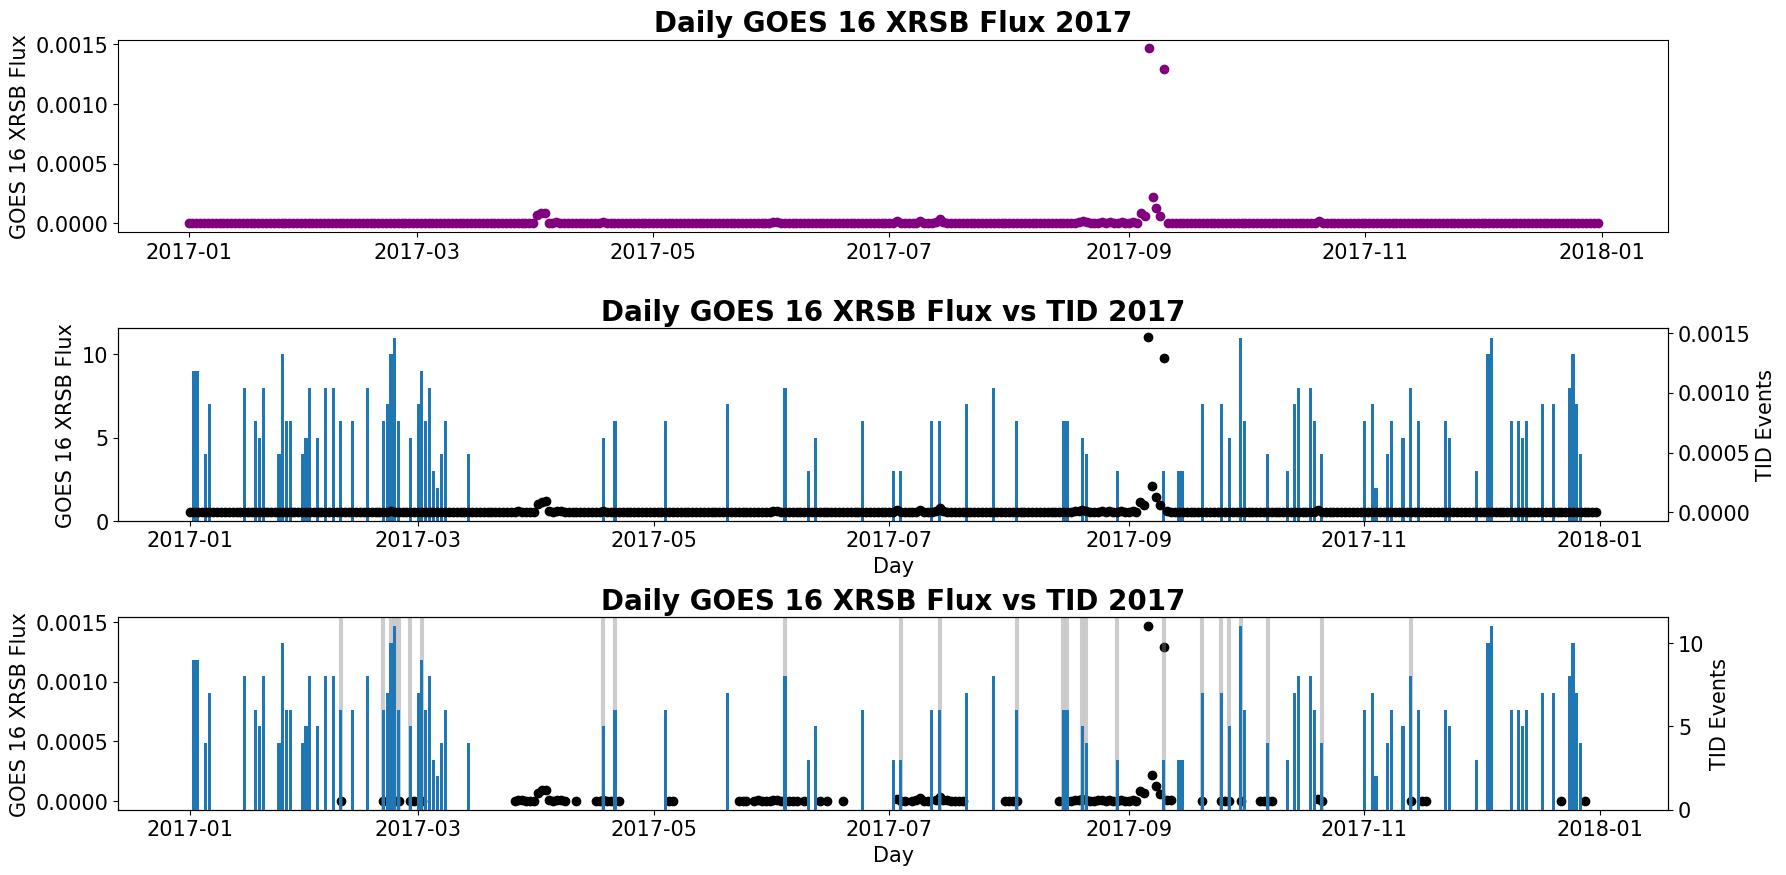

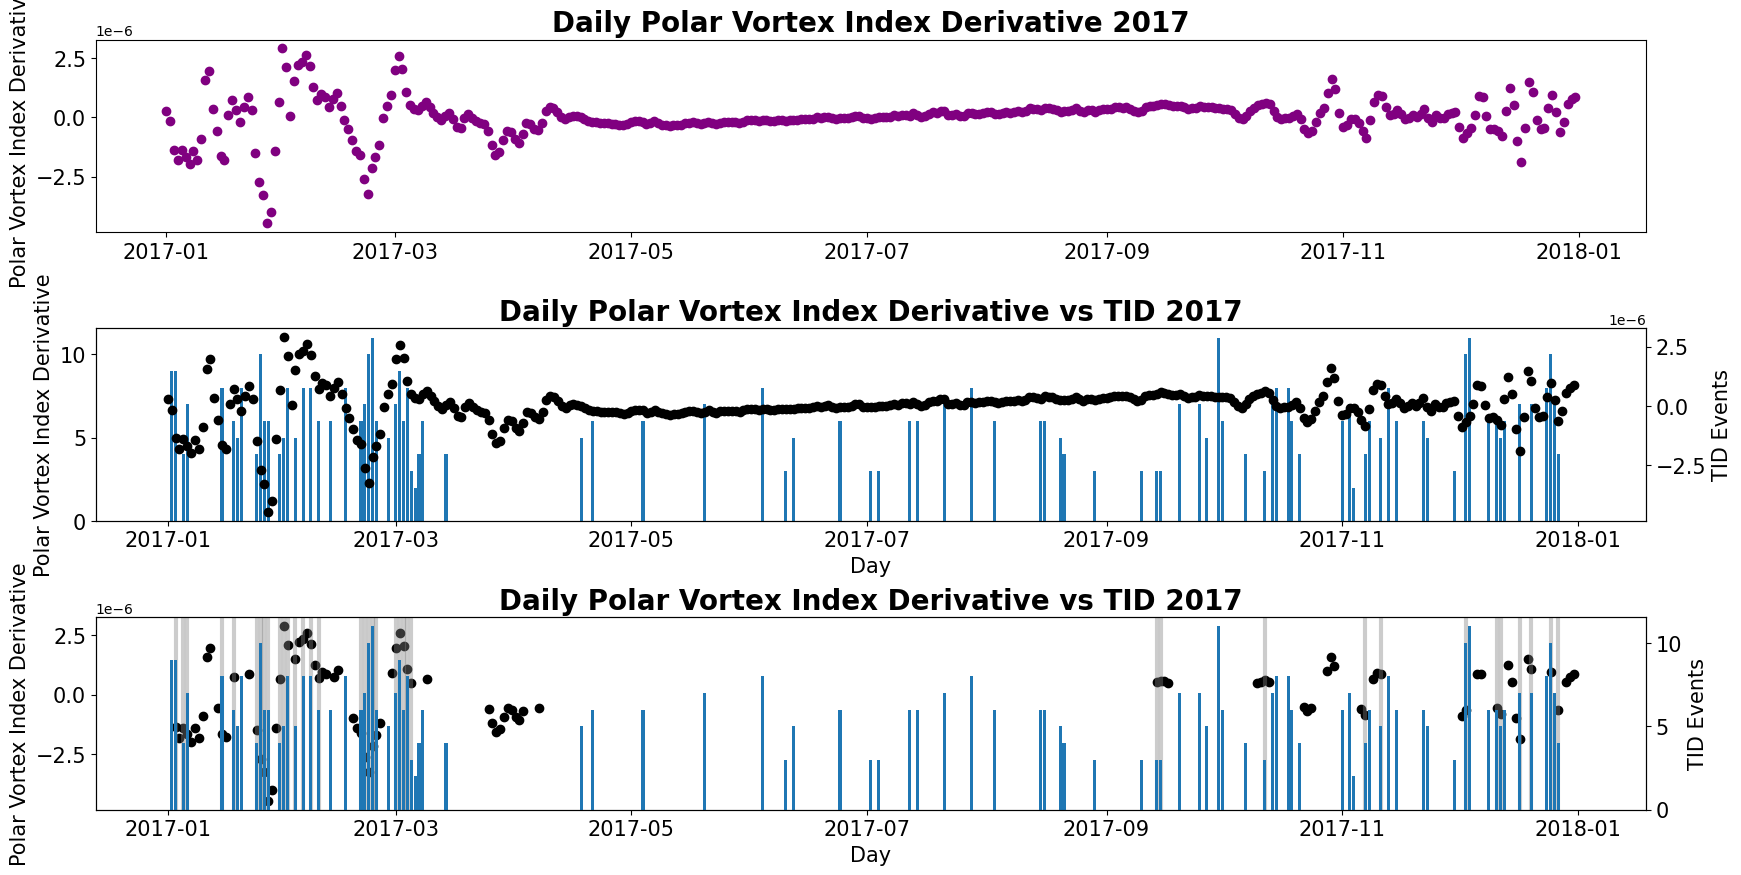

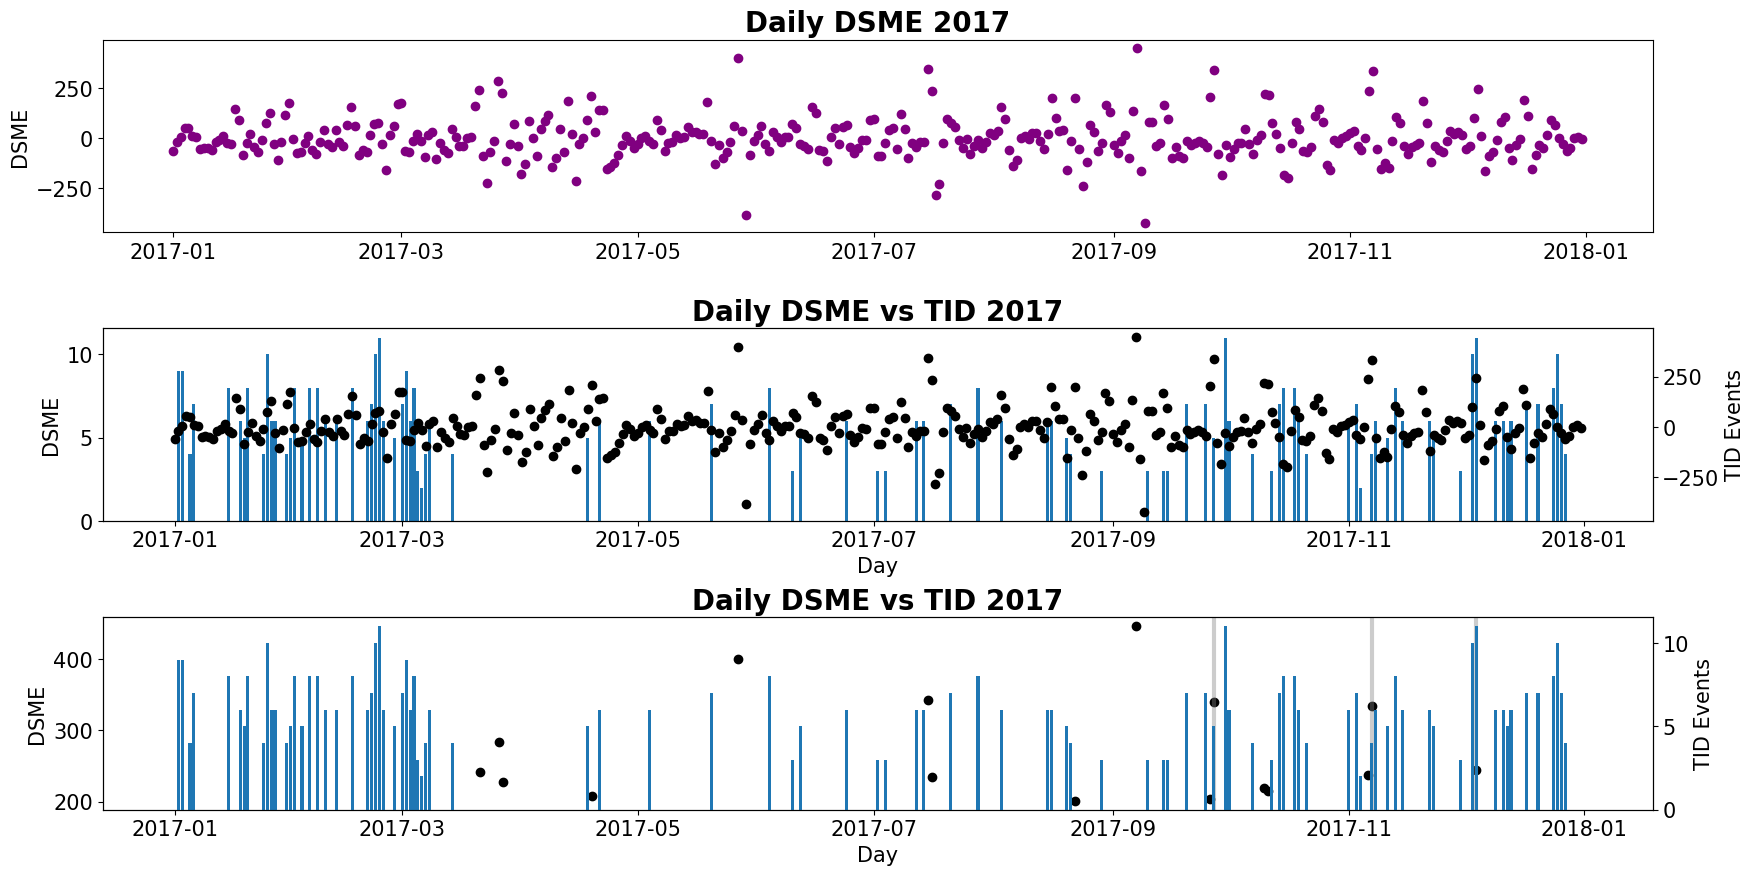

In [ ]:
# first run: identify filter values
column_names = data.columns.tolist()
# Iterating through two keys simultaneously
for driver in column_names:
  if driver == 'date':
    continue
  if driver == 'date_s':
    continue
  if driver == 'tid':
    continue
  if driver == 'Unnamed: 0':
    continue

  oname, da = all(da_fil, driver)
  oname2, da2  = all(data, driver)

  fig, axs = plt.subplots(3,1,figsize=(20,10))
  plt.subplots_adjust(hspace=0.5)

  axs[0].scatter(data['date'], data[driver], color = 'purple')
  axs[0].set_title('Daily '+ str(oname) +' 2017', fontsize = 20,fontweight = 'bold')
  axs[0].set_ylabel(oname,fontsize = 15)
  axs[0].tick_params(labelsize = 15)

  axs[1].bar(data['date'], data['tid'])
  ax2 = axs[1].twinx()
  ax2.scatter(data['date'], data[driver], color = 'black')
  axs[1].set_title('Daily '+str(oname)+' vs TID 2017', fontsize = 20,fontweight = 'bold')
  axs[1].set_ylabel(oname,fontsize = 15)
  axs[1].set_xlabel('Day',fontsize = 15)
  axs[1].tick_params(labelsize = 15)
  ax2.set_ylabel('TID Events',fontsize = 15)
  ax2.tick_params(labelsize = 15)

  axs[2].scatter(da2['date'], da2[driver], color = 'black')
  ax2 = axs[2].twinx()
  ax2.bar(data['date'], data['tid'])
  axs[2].set_title('Daily '+str(oname)+' vs TID 2017', fontsize = 20,fontweight = 'bold')
  axs[2].set_ylabel(oname,fontsize = 15)
  axs[2].set_xlabel('Day',fontsize = 15)
  axs[2].tick_params(labelsize = 15)
  ax2.set_ylabel('TID Events',fontsize = 15)
  ax2.tick_params(labelsize = 15)
  for index, value in da['date'].items():
    start = value
    end   = value + datetime.timedelta(days=1)
    axs[2].axvspan(start, start, color='grey', alpha=0.4, linewidth=3)

  fig.savefig(drive_loc + 'driver_highlighted/'+str(oname)+'.png')

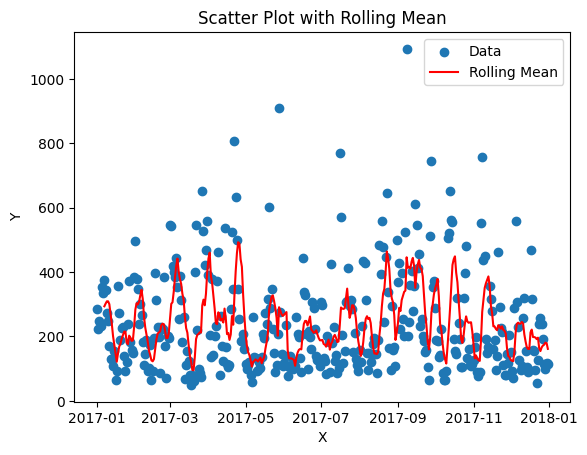

In [ ]:
# Create a scatter plot
plt.scatter(data['date'], data['sme'], label='Data')


# Calculate the rolling mean
window_size = 7

# Drop the NaN values
#df = df.dropna()

# Plot the rolling mean
plt.plot(data['date'], data['sme'].rolling(window=window_size).mean(), color='red', label='Rolling Mean')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Scatter Plot with Rolling Mean')

# Show the plot
plt.show()

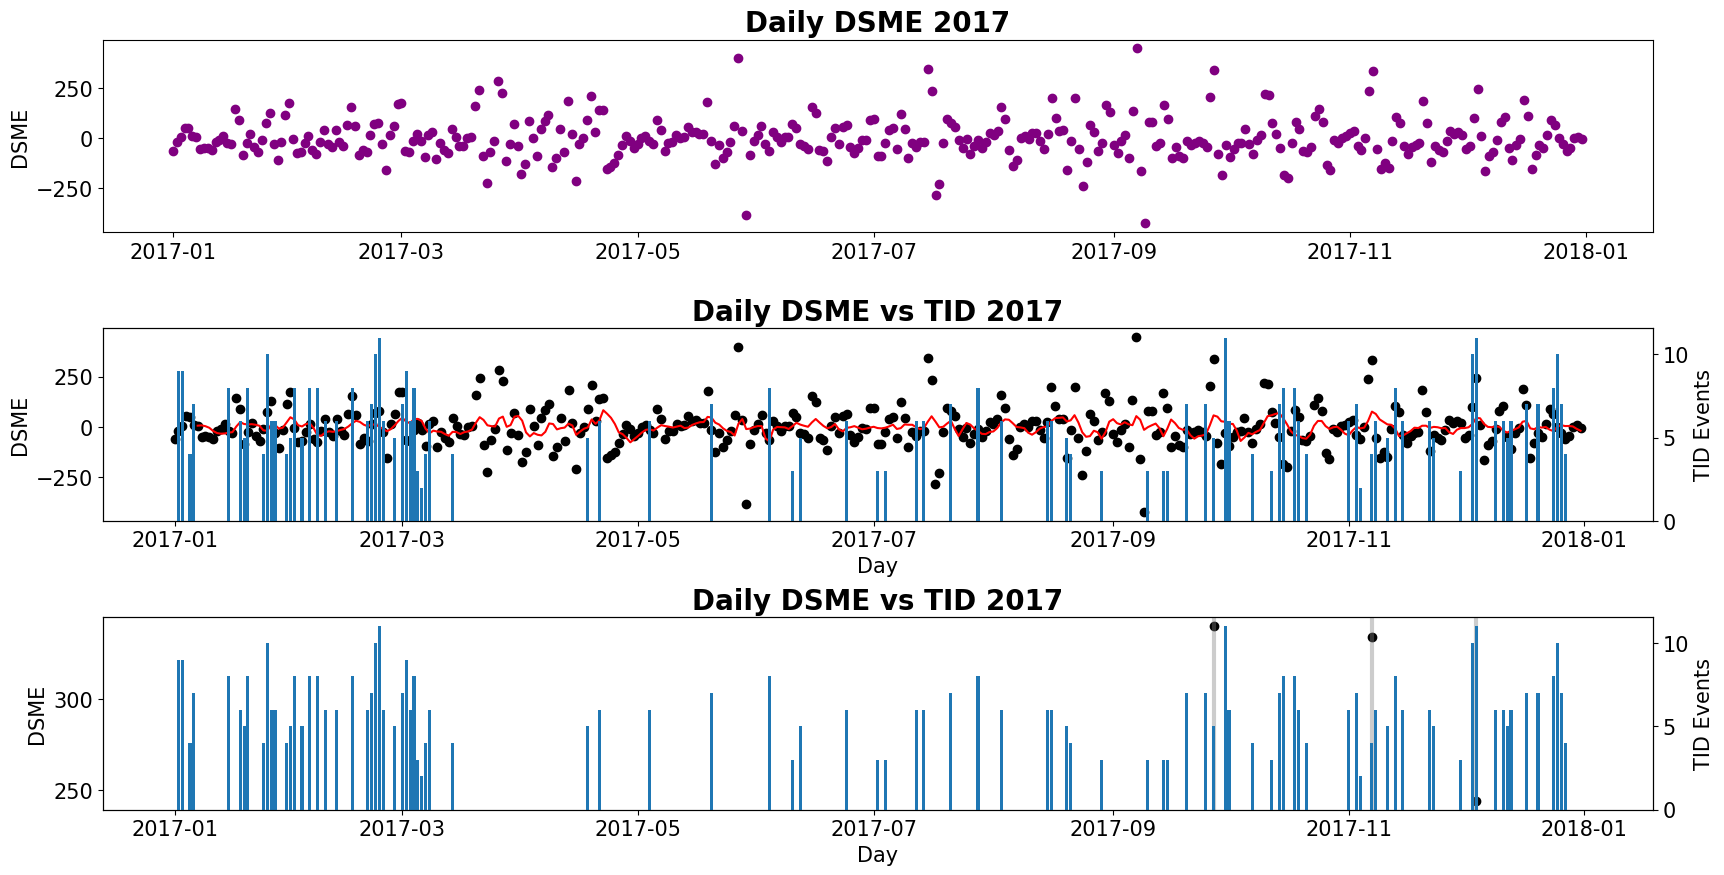

In [ ]:
driver = 'dsme'

oname, da = all(da_fil, driver)

fig, axs = plt.subplots(3,1,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)

axs[0].scatter(data['date'], data[driver], color = 'purple')
axs[0].set_title('Daily '+ str(oname) +' 2017', fontsize = 20,fontweight = 'bold')
axs[0].set_ylabel(oname,fontsize = 15)
axs[0].tick_params(labelsize = 15)

axs[1].scatter(data['date'], data[driver], color = 'black')
ax2 = axs[1].twinx()
ax2.bar(data['date'], data['tid'])
axs[1].plot(data['date'], data['dsme'].rolling(window=window_size).mean(), color='red', label='Rolling Mean')
axs[1].set_title('Daily '+str(oname)+' vs TID 2017', fontsize = 20,fontweight = 'bold')
axs[1].set_ylabel(oname,fontsize = 15)
axs[1].set_xlabel('Day',fontsize = 15)
axs[1].tick_params(labelsize = 15)
ax2.set_ylabel('TID Events',fontsize = 15)
ax2.tick_params(labelsize = 15)

axs[2].scatter(da['date'], da[driver], color = 'black')
ax2 = axs[2].twinx()
ax2.bar(data['date'], data['tid'])
axs[2].set_title('Daily '+str(oname)+' vs TID 2017', fontsize = 20,fontweight = 'bold')
axs[2].set_ylabel(oname,fontsize = 15)
axs[2].set_xlabel('Day',fontsize = 15)
axs[2].tick_params(labelsize = 15)
ax2.set_ylabel('TID Events',fontsize = 15)
ax2.tick_params(labelsize = 15)
for index, value in da['date'].items():
  start = value
  end   = value + datetime.timedelta(days=1)
  axs[2].axvspan(start, start, color='grey', alpha=0.4, linewidth=3)

(0.0, 0.005)

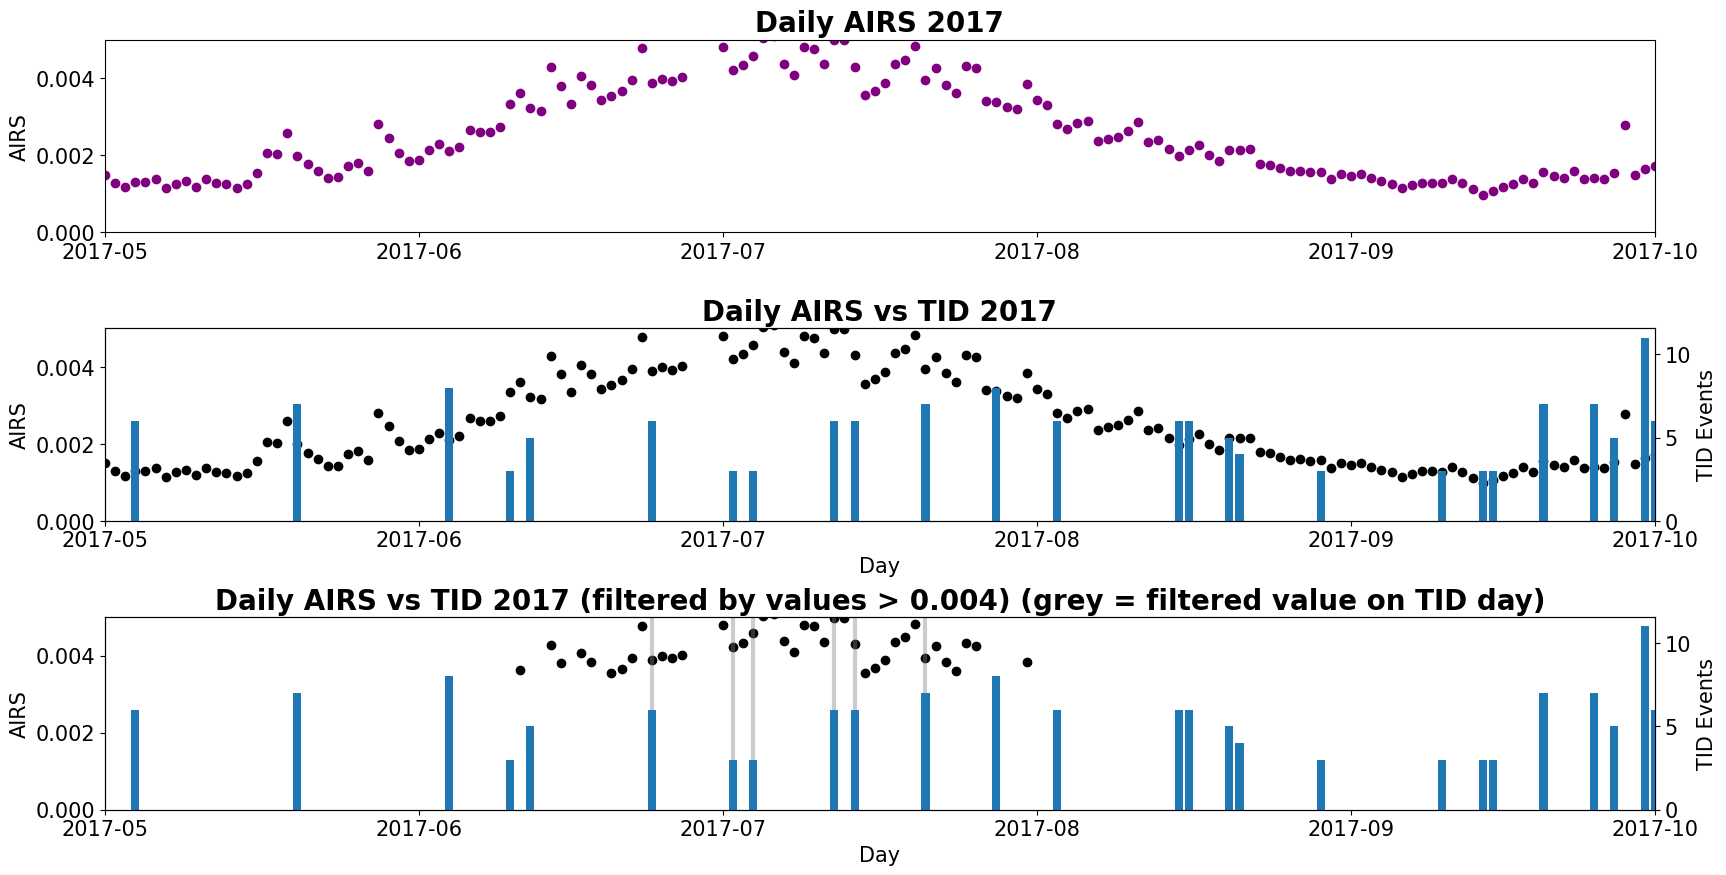

In [ ]:
driver = 'airs'

oname, da = all(da_fil, driver)
oname2, da2  = all(data, driver)

start_date = pd.to_datetime('2017-05-01')
end_date = pd.to_datetime('2017-10-01')

fig, axs = plt.subplots(3,1,figsize=(20,10))
plt.subplots_adjust(hspace=0.5)

axs[0].scatter(data['date'], data[driver], color = 'purple')
axs[0].set_title('Daily '+ str(oname) +' 2017', fontsize = 20,fontweight = 'bold')
axs[0].set_ylabel(oname,fontsize = 15)
axs[0].tick_params(labelsize = 15)
axs[0].set_xlim(start_date, end_date)
axs[0].set_ylim(0, 0.005)

axs[1].scatter(data['date'], data[driver], color = 'black', zorder=0)
ax2 = axs[1].twinx()
ax2.bar(data['date'], data['tid'],zorder=1)
#axs[1].plot(data['date'], data[driver].rolling(window=window_size).mean(), color='red', label='Rolling Mean',zorder=2)
axs[1].set_title('Daily '+str(oname)+' vs TID 2017', fontsize = 20,fontweight = 'bold')
axs[1].set_ylabel(oname,fontsize = 15)
axs[1].set_xlabel('Day',fontsize = 15)
axs[1].tick_params(labelsize = 15)
ax2.set_ylabel('TID Events',fontsize = 15)
ax2.tick_params(labelsize = 15)
axs[1].set_xlim(start_date, end_date)
axs[1].set_ylim(0, 0.005)

da = da.reset_index()

axs[2].scatter(da2['date'], da2[driver], color = 'black')
ax2 = axs[2].twinx()
ax2.bar(data['date'], data['tid'])
axs[2].set_title('Daily '+str(oname)+' vs TID 2017 (filtered by values > 0.004) (grey = filtered value on TID day)', fontsize = 20,fontweight = 'bold')
axs[2].set_ylabel(oname,fontsize = 15)
axs[2].set_xlabel('Day',fontsize = 15)
axs[2].tick_params(labelsize = 15)
ax2.set_ylabel('TID Events',fontsize = 15)
ax2.tick_params(labelsize = 15)
for index, value in da['date'].items():
  start = value
  end   = value + datetime.timedelta(days=1)
  axs[2].axvspan(start, start, color='grey', alpha=0.4, linewidth=3)
axs[2].set_xlim(start_date, end_date)
axs[2].set_ylim(0, 0.005)

In [ ]:
# Group by month
per_da_geo = []
per_da_met = []
data_fil = da_fil
data_fil.set_index('date', inplace=True)
column_names = data.columns.tolist()
grouped = data_fil.resample('M')
monthly_dfs = {name.strftime('%b'): group for name, group in grouped}
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month_name in month:
  for driver in column_names:
    if driver == 'date':
      continue
    if driver == 'date_s':
      continue
    if driver == 'tid':
      continue
    if driver == 'Unnamed: 0':
      continue
    if driver == 'xrsb_flux':
      continue
    da = monthly_dfs[month_name]
    num_tid = np.shape(da)
    da = all(da, driver)
    num_rows = np.shape(da[1])
    percent = num_rows[0]/num_tid[0]*100
    if geo_check(driver):
      per_da_geo.append({'month': month_name, 'driver': driver, 'percent': percent})
    if met_check(driver):
      per_da_met.append({'month': month_name, 'driver': driver, 'percent': percent})

per_da_met = pd.DataFrame(per_da_met, columns=['month', 'driver', 'percent'])
per_da_geo = pd.DataFrame(per_da_geo, columns=['month', 'driver', 'percent'])

per_da_met.set_index(['month', 'driver'], inplace=True)
per_da_geo.set_index(['month', 'driver'], inplace=True)

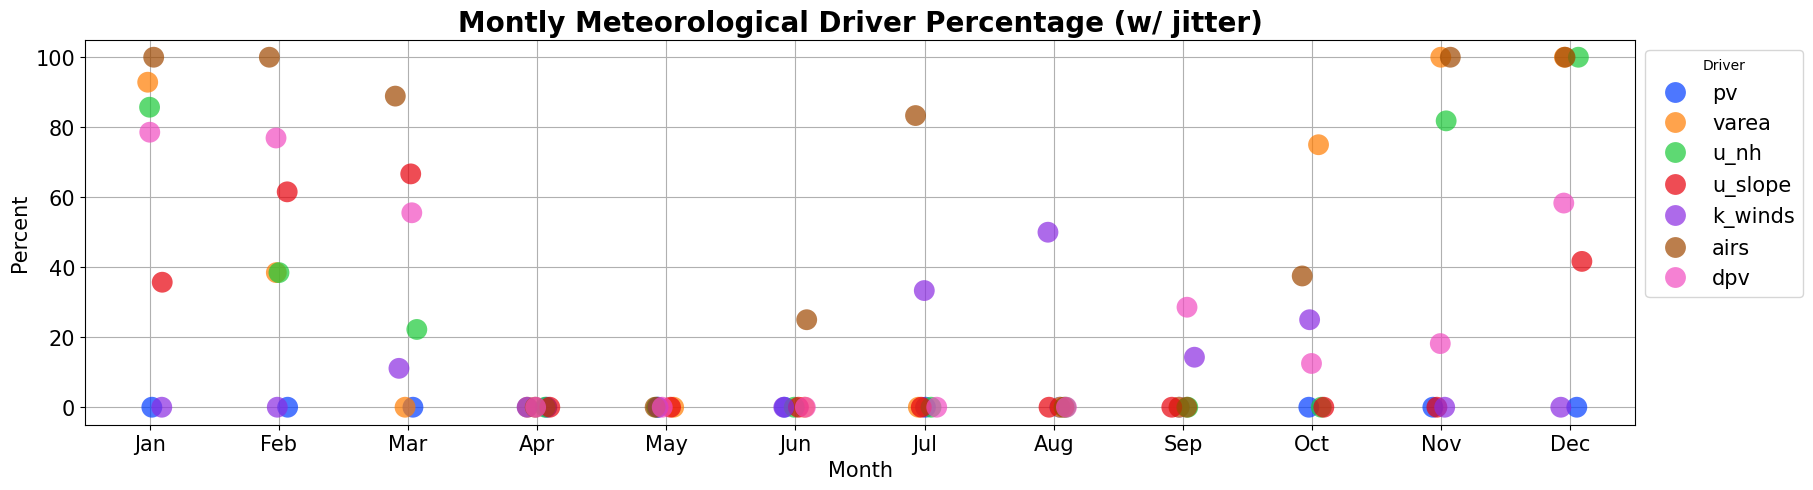

In [ ]:
#per_data = per_da_met.reset_index()

# Create a scatter plot
plt.figure(figsize=(20, 5))

# Scatter plot with automatic default colors
sns.stripplot(data=per_da_met, x='month', y='percent', hue='driver', palette='bright',s=15, alpha=0.7, jitter=True)

# Create a legend
plt.legend(title='Driver', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 15)

plt.xlabel('Month',fontsize = 15)
plt.ylabel('Percent',fontsize = 15)
plt.title('Montly Meteorological Driver Percentage (w/ jitter)',fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15)
plt.grid(True)
plt.show()

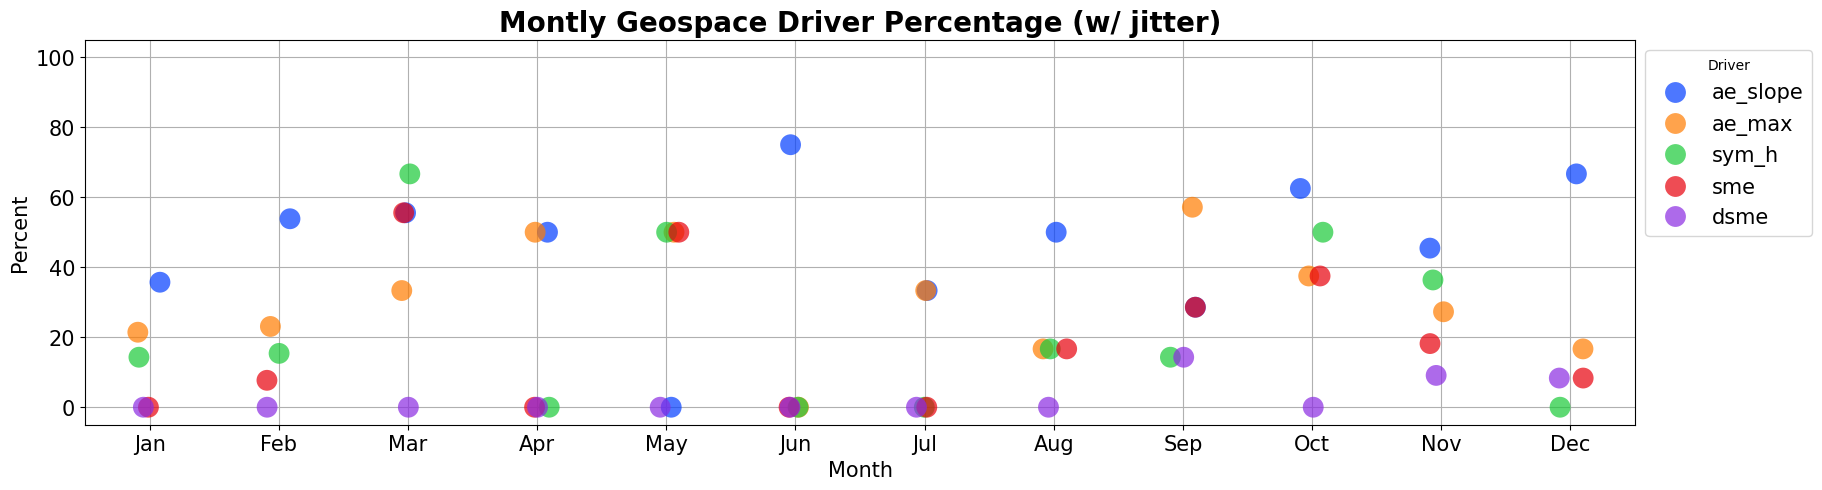

In [ ]:
#per_data = per_da_met.reset_index()

# Create a scatter plot
plt.figure(figsize=(20, 5))

# Scatter plot with automatic default colors
sns.stripplot(data=per_da_geo, x='month', y='percent', hue='driver', palette='bright',s=15, alpha=0.7, jitter=True)

plt.legend(title='Driver', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 15)

plt.xlabel('Month',fontsize = 15)
plt.ylabel('Percent',fontsize = 15)
plt.title('Montly Geospace Driver Percentage (w/ jitter)',fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15)
plt.ylim(-5,105)
plt.grid(True)
plt.show()

In [ ]:
def calculate_percent(df, da):
  num_tid = np.shape(df)
  num_rows = np.shape(da)
  percent = num_rows[0]/num_tid[0]*100
  return percent

In [ ]:
# Group by month
per_da_geo = []
per_da_met = []
data_fil = da_fil
#data_fil.set_index('date', inplace=True)
column_names = data.columns.tolist()
grouped = data_fil.resample('M')
monthly_dfs = {name.strftime('%b'): group for name, group in grouped}
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for month_name in month:
  mon_geo = pd.DataFrame()
  mon_met = pd.DataFrame()
  for driver in column_names:
    if driver == 'date':
      continue
    if driver == 'date_s':
      continue
    if driver == 'tid':
      continue
    if driver == 'Unnamed: 0':
      continue
    if driver == 'xrsb_flux':
      continue
    da = monthly_dfs[month_name]
#    da = da[da['xrsb_flux'] <= 0.0000005]
    if geo_check(driver):
      da = all(da, driver)
      mon_geo = pd.concat([mon_geo, da[1]])
    if met_check(driver):
      da = all(da, driver)
      mon_met = pd.concat([mon_met, da[1]])
  mon_geo = mon_geo.drop_duplicates()
  mon_met = mon_met.drop_duplicates()
  per_geo = calculate_percent(monthly_dfs[month_name], mon_geo)
  per_met = calculate_percent(monthly_dfs[month_name], mon_met)
  per_da_geo.append({'month': month_name, 'percent': per_geo})
  per_da_met.append({'month': month_name, 'percent': per_met})

per_da_met = pd.DataFrame(per_da_met, columns=['month', 'percent'])
per_da_geo = pd.DataFrame(per_da_geo, columns=['month', 'percent'])
per_da_met.set_index(['month'], inplace=True)
per_da_geo.set_index(['month'], inplace=True)

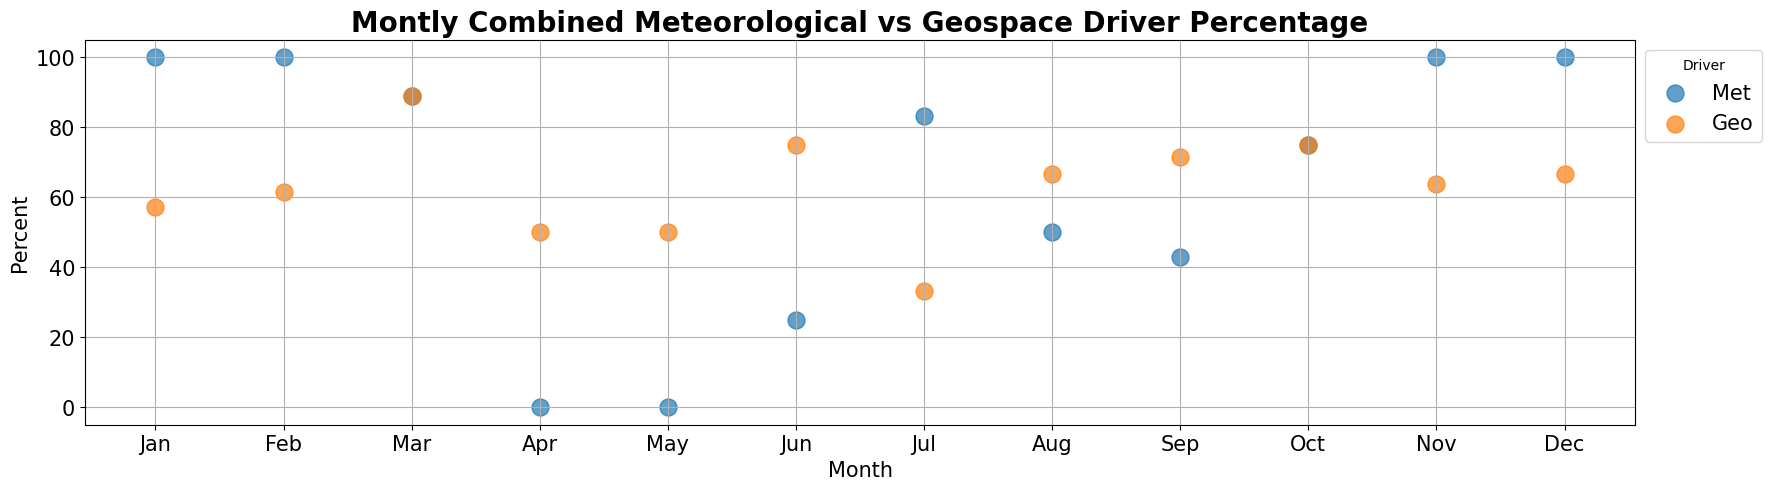

In [ ]:
# Create a scatter plot
plt.figure(figsize=(20, 5))

# Scatter plot with automatic default colors
plt.scatter(per_da_met.index, per_da_met['percent'], label='Met',s=150, alpha=0.7)
plt.scatter(per_da_geo.index, per_da_geo['percent'], label='Geo',s=150, alpha=0.7)

plt.legend(title='Driver', bbox_to_anchor=(1, 1), loc='upper left', fontsize = 15)

plt.xlabel('Month',fontsize = 15)
plt.ylabel('Percent',fontsize = 15)
plt.title('Montly Combined Meteorological vs Geospace Driver Percentage',fontsize = 20, fontweight = 'bold')
plt.tick_params(labelsize = 15)
plt.grid(True)
plt.show()